# **UAS Deep Learning Nomor 1 (Time Series Analysis - LSTM)**
# **Alicia Jocelyn Siahaya - 2602072552**

Dataset ini berisi harga harian historis untuk beberapa saham sektor teknologi.

Data historis diambil dari Yahoo finance melalui paket python yfinance dan berisi harga hingga tanggal 01 April 2020.

Struktur Data:
1. Date - menunjukkan tanggal perdagangan
2. Open - harga pembukaan
3. High - harga maksimum selama sehari
4. Low - harga minimum selama sehari
5. Close - harga penutupan disesuaikan untuk pemecahan
6. Adj Close - harga penutupan disesuaikan yang telah disesuaikan untuk dividen dan pemecahan.
7. Volume - jumlah saham yang berpindah tangan selama sehari

In [394]:
#Menggunakan gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [395]:
%cd /content/drive/MyDrive/UAS Deep Learning/Dataset 2B

/content/drive/MyDrive/UAS Deep Learning/Dataset 2B


In [396]:
!ls

AMZN.csv  CSCO.csv


In [397]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# **LOAD DATA** for both AMZN and CSCO

In [557]:
AMZN = pd.read_csv('AMZN.csv', parse_dates=['Date'],index_col=['Date'])
AMZN.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [617]:
CSCO = pd.read_csv('CSCO.csv', parse_dates=['Date'],index_col=['Date'])
CSCO.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-02-16,0.0,0.079861,0.073785,0.077257,0.059806,940636800
1990-02-20,0.0,0.079861,0.074653,0.079861,0.061822,151862400
1990-02-21,0.0,0.078993,0.075521,0.078125,0.060478,70531200
1990-02-22,0.0,0.081597,0.078993,0.078993,0.061150,45216000
1990-02-23,0.0,0.079861,0.078125,0.078559,0.060814,44697600


# **Exploratory Data Analysis**

#### **Closing Price of each company**

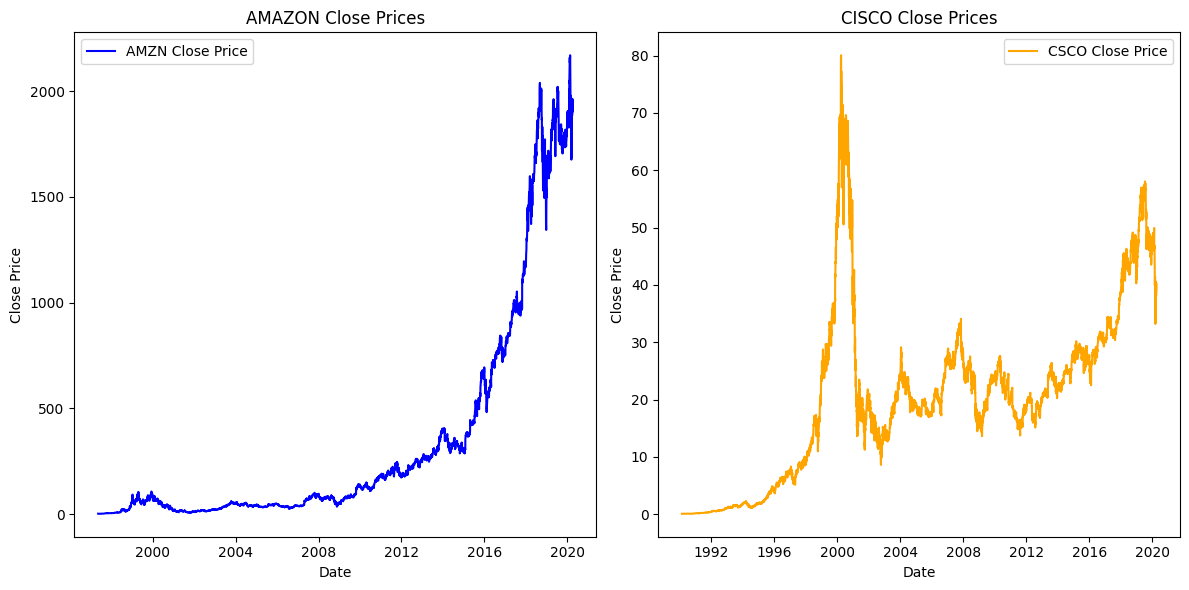

In [518]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].plot(AMZN.index, AMZN['Close'], label='AMZN Close Price', color='blue')
axes[0].set_title('AMAZON Close Prices')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Close Price')
axes[0].legend()

axes[1].plot(CSCO.index, CSCO['Close'], label='CSCO Close Price', color='orange')
axes[1].set_title('CISCO Close Prices')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Close Price')
axes[1].legend()

plt.tight_layout()
plt.show()

# **1. AMZN**

## **DATA UNDERSTANDING**

In [515]:
AMZN.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [519]:
AMZN.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-26,1902.000000,1956.489990,1889.290039,1955.489990,1955.489990,6221300
2020-03-27,1930.859985,1939.790039,1899.920044,1900.099976,1900.099976,5387900
2020-03-30,1922.829956,1973.630005,1912.339966,1963.949951,1963.949951,6126100
2020-03-31,1964.349976,1993.020020,1944.010010,1949.719971,1949.719971,5123600
2020-04-01,1932.969971,1944.959961,1893.000000,1907.699951,1907.699951,4111100


In [520]:
AMZN_df = pd.read_csv('AMZN.csv')
print("Starting date: ",AMZN_df.iloc[0][0])
print("Ending date: ", AMZN_df.iloc[-1][0])

Starting date:  1997-05-15
Ending date:  2020-04-01


In [521]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5758 entries, 1997-05-15 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5758 non-null   float64
 1   High       5758 non-null   float64
 2   Low        5758 non-null   float64
 3   Close      5758 non-null   float64
 4   Adj Close  5758 non-null   float64
 5   Volume     5758 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 314.9 KB


In [404]:
AMZN.shape

(5758, 6)

Karena problem nya adalah `Time Series Analysis` maka kita hanya menggunakan 2 kolom yaitu `Date` dan `Close` sesuai ketentuan soal, dimana `Date` dijadikan sebagai index saat read data.

Lalu kolom-kolom lain akan di drop

In [558]:
AMZN = AMZN.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1)
AMZN.head()

,Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083


In [406]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5758 entries, 1997-05-15 to 2020-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5758 non-null   float64
dtypes: float64(1)
memory usage: 90.0 KB


In [408]:
AMZN.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,5758.0,340.41758,523.140207,1.395833,37.5625,81.599998,334.290001,2170.219971


In [523]:
AMZN.isna().sum()

Close    0
dtype: int64

Tidak ada missing value dalam dataset AMZN

### **PLOTTING**

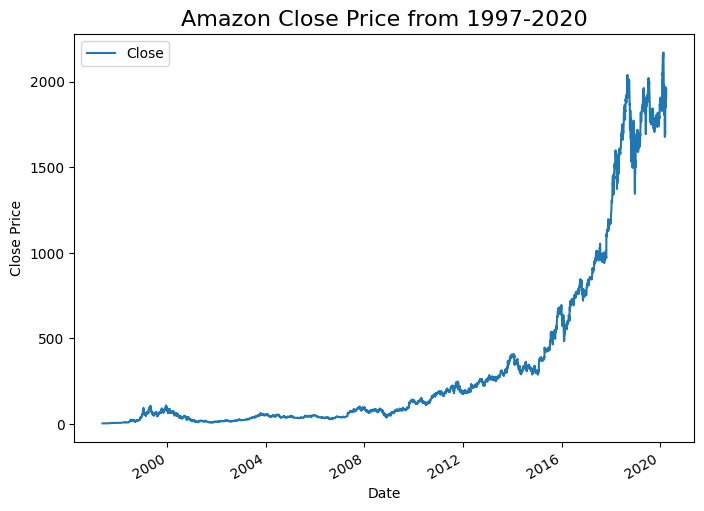

In [409]:
import matplotlib.pyplot as plt

AMZN.plot(figsize=(8, 6))
plt.title('Amazon Close Price from 1997-2020',fontsize=16)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

Untuk perusahaan AMAZON, analisa saham dimulai sejak tahun 1997 yang menunjukkan `Close Price` di angka 0, lalu sekitar tahun 2015, saham mulai mengalami kenaikan hingga akhirnya pada 2019-2020 mengalami kenaikan yang sangat drastis

## **SPLIT DATA**

Membagi data menjadi 5 (Senin-Jumat) dengan output 1 (Senin)

In [526]:
window_size = 5
horizon = 1

In [559]:
time_step = AMZN.index.to_numpy()
close_price = AMZN['Close'].values.astype('float32')

#show data
time_step[:window_size], close_price[:window_size]

(array(['1997-05-15T00:00:00.000000000', '1997-05-16T00:00:00.000000000',
        '1997-05-19T00:00:00.000000000', '1997-05-20T00:00:00.000000000',
        '1997-05-21T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([1.9583334, 1.7291666, 1.7083334, 1.6354166, 1.4270834],
       dtype=float32))

In [560]:
total_size = len(close_price)
train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)
print('Total length of the data :', total_size)
print('Training set length :', train_size)
print('Validation set length :', val_size)
print('Testing set length :', total_size-train_size-val_size)

Total length of the data : 5758
Training set length : 4606
Validation set length : 575
Testing set length : 577


Membagi dataset menjadi 80% training, 10% validation dan 10% testing sesuai dengan ketentuan soal. Dari jumlah dataset sebesar 5758, hingga terbagi untuk training sebesar 4606, untuk validation 575 dan untuk training 577

In [561]:
train_time_AMZN, train_prices_AMZN = time_step[:train_size], close_price[:train_size]
val_time_AMZN, val_prices_AMZN = time_step[train_size:train_size + val_size], close_price[train_size:train_size + val_size]
test_time_AMZN, test_prices_AMZN = time_step[train_size + val_size:], close_price[train_size + val_size:]

print("Train :", len(train_time_AMZN), len(train_prices_AMZN))
print("Validation :", len(val_time_AMZN), len(val_prices_AMZN))
print("Test :", len(test_time_AMZN), len(test_prices_AMZN))

Train : 4606 4606
Validation : 575 575
Test : 577 577


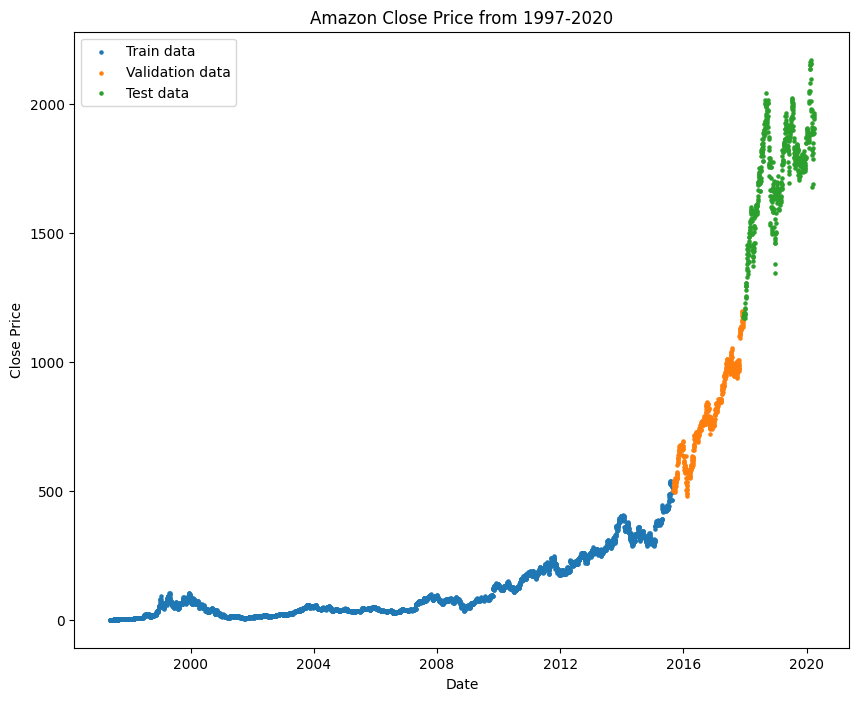

In [530]:
plt.figure(figsize=(10, 8))
plt.scatter(train_time_AMZN, train_prices_AMZN, s=5, label="Train data")
plt.scatter(val_time_AMZN, val_prices_AMZN, s=5, label='Validation data')
plt.scatter(test_time_AMZN, test_prices_AMZN, s=5, label="Test data")
plt.title("Amazon Close Price from 1997-2020")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Plot diatas adalah hasil dataset setelah dilakukan split

### **PREPROCESSING**

### **CREATING DATASET**

Berdasarkan `window_size` dan `horizon` yang sudah dideklarasikan di atas

In [562]:
def create_dataset(dataset, window_size, horizon):
    X, y = [], []
    for i in range(len(dataset) - window_size - horizon + 1):
        feature = dataset[i:i + window_size]
        target = dataset[i + window_size:i + window_size + horizon]
        X.append(feature)
        y.append(target)
    return np.array(X), np.array(y)

In [563]:
x_train_AMZN, y_train_AMZN = create_dataset(train_prices_AMZN, window_size, horizon)
x_val_AMZN, y_val_AMZN = create_dataset(val_prices_AMZN, window_size, horizon)
x_test_AMZN, y_test_AMZN = create_dataset(test_prices_AMZN, window_size, horizon)

print('Train :', x_train_AMZN.shape, y_train_AMZN.shape)
print('Validation :', x_val_AMZN.shape, y_val_AMZN.shape)
print('Test :', x_test_AMZN.shape, y_test_AMZN.shape)

Train : (4601, 5) (4601, 1)
Validation : (570, 5) (570, 1)
Test : (572, 5) (572, 1)


#### **SCALING**

In [418]:
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# x_train_AMZN = scaler.fit_transform(x_train_AMZN)
# x_val_AMZN = scaler.transform(x_val_AMZN)
# x_test_AMZN = scaler.transform(x_test_AMZN)

Scaling tidak digunakan karena setelah saya menggunakan scaling, hasil model menunjukkan performa yang lebih buruk dibandingkan sebelum discaling. Maka saya memutuskan untuk tidak menggunakan scaling.

## **LSTM MODEL**

Melakukan reshape sesuai dengan ketentuan model LSTM

In [564]:
## LSTM BUTUH RESHAPE [samples, time steps, features]
x_train_AMZN = x_train_AMZN.reshape((x_train_AMZN.shape[0], x_train_AMZN.shape[1], 1))
x_val_AMZN = x_val_AMZN.reshape((x_val_AMZN.shape[0], x_val_AMZN.shape[1], 1))
x_test_AMZN = x_test_AMZN.reshape((x_test_AMZN.shape[0], x_test_AMZN.shape[1], 1))

In [565]:
print('Train :', x_train_AMZN.shape, y_train_AMZN.shape)
print('Validation :', x_val_AMZN.shape, y_val_AMZN.shape)
print('Test :', x_test_AMZN.shape, y_test_AMZN.shape)

Train : (4601, 5, 1) (4601, 1)
Validation : (570, 5, 1) (570, 1)
Test : (572, 5, 1) (572, 1)


### **1. BASELINE MODEL**

Buatlah arsitektur baseline dengan LSTM (units=50) dan layer akhir berupa node Perceptron dengan units=1. Activation function untuk LSTM menggunakan ReLU

In [421]:
from tensorflow.keras.layers import LSTM, Dense

hidden_units = 50

model_baseline_AMZN = Sequential()
model_baseline_AMZN.add(LSTM(units=hidden_units, activation='relu', input_shape=(window_size, 1)))
model_baseline_AMZN.add(Dense(units=horizon))

model_baseline_AMZN.build()
model_baseline_AMZN.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 50)                10400     
                                                                 
 dense_16 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [422]:
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import MeanAbsoluteError, MeanAbsolutePercentageError, MeanSquaredError

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

optimizer = Adam()

model_baseline_AMZN.compile(optimizer=optimizer,
                         loss='mse',
                         metrics=[
                             rmse,
                             MeanAbsoluteError(name='mae'),
                             MeanAbsolutePercentageError(name='mape')])

In [423]:
history_baseline_AMZN = model_baseline_AMZN.fit(x_train_AMZN, y_train_AMZN,
                             epochs=100,
                             batch_size=32,
                             validation_data=(x_val_AMZN, y_val_AMZN))

Epoch 1/100
144/144 [==============================] - 3s 8ms/step - loss: 4366.1890 - rmse: 37.2853 - mae: 26.1024 - mape: 27.9878 - val_loss: 383.9478 - val_rmse: 18.4569 - val_mae: 14.3881 - val_mape: 1.8992
Epoch 2/100
144/144 [==============================] - 1s 4ms/step - loss: 31.1617 - rmse: 5.3032 - mae: 3.3663 - mape: 5.6872 - val_loss: 322.2376 - val_rmse: 16.8943 - val_mae: 12.6773 - val_mape: 1.6796
Epoch 3/100
144/144 [==============================] - 1s 4ms/step - loss: 30.1068 - rmse: 5.1504 - mae: 3.2641 - mape: 4.6305 - val_loss: 543.3012 - val_rmse: 22.4910 - val_mae: 18.4598 - val_mape: 2.3783
Epoch 4/100
144/144 [==============================] - 1s 4ms/step - loss: 25.1817 - rmse: 4.7162 - mae: 2.9436 - mape: 4.2657 - val_loss: 319.8341 - val_rmse: 16.7827 - val_mae: 12.9048 - val_mape: 1.7024
Epoch 5/100
144/144 [==============================] - 1s 4ms/step - loss: 27.4336 - rmse: 4.9379 - mae: 3.0830 - mape: 4.2175 - val_loss: 294.8784 - val_rmse: 16.4948 - v

In [424]:
x_test_AMZN = x_test_AMZN.reshape((x_test_AMZN.shape[0], x_test_AMZN.shape[1], 1))

train_predict_AMZN = model_baseline_AMZN.predict(x_train_AMZN)
val_predict_AMZN = model_baseline_AMZN.predict(x_val_AMZN)
test_predict_AMZN = model_baseline_AMZN.predict(x_test_AMZN)

print(train_predict_AMZN.shape, val_predict_AMZN.shape, test_predict_AMZN.shape)

18/18 [==============================] - 0s 3ms/step
(4601, 1) (570, 1) (572, 1)


### **PLOT PREDICTION**

Membandingkan hasil prediction dengan dataset asli

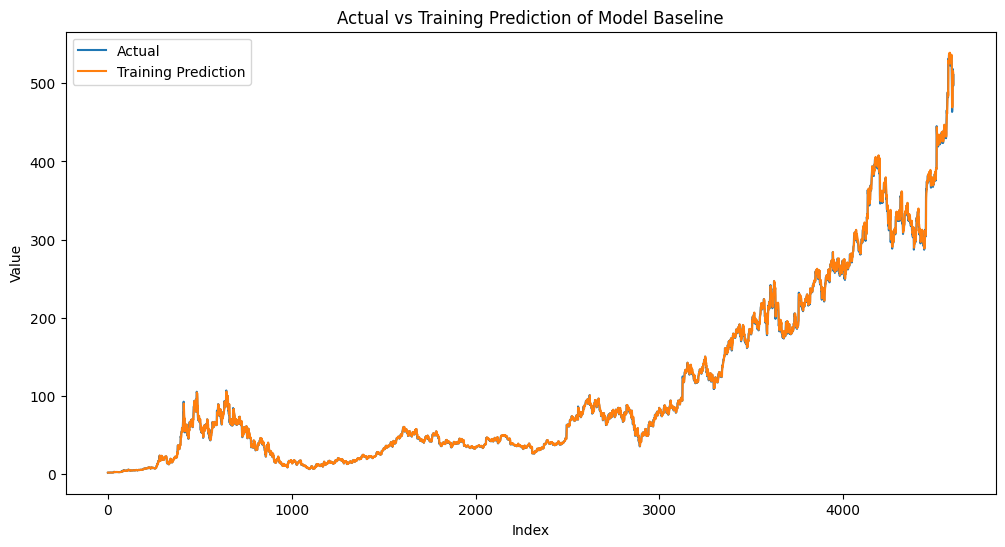

In [425]:
plt.figure(figsize =(12, 6))
plt.plot(y_train_AMZN, label="Actual")
plt.plot(train_predict_AMZN, label="Training Prediction")
plt.title("Actual vs Training Prediction of Model Baseline")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()


Hasil prediksi menggunakan data training menghasilkan hasil yang sangat bagus, dilihat dari kemampuan model untuk menghasilkan grafik `Close` yang sangat mirip dengan training. Hal ini menandakan bahwa model sangat bagus dalam memprediksi data training dan menjalani proses training dengan sangat baik.




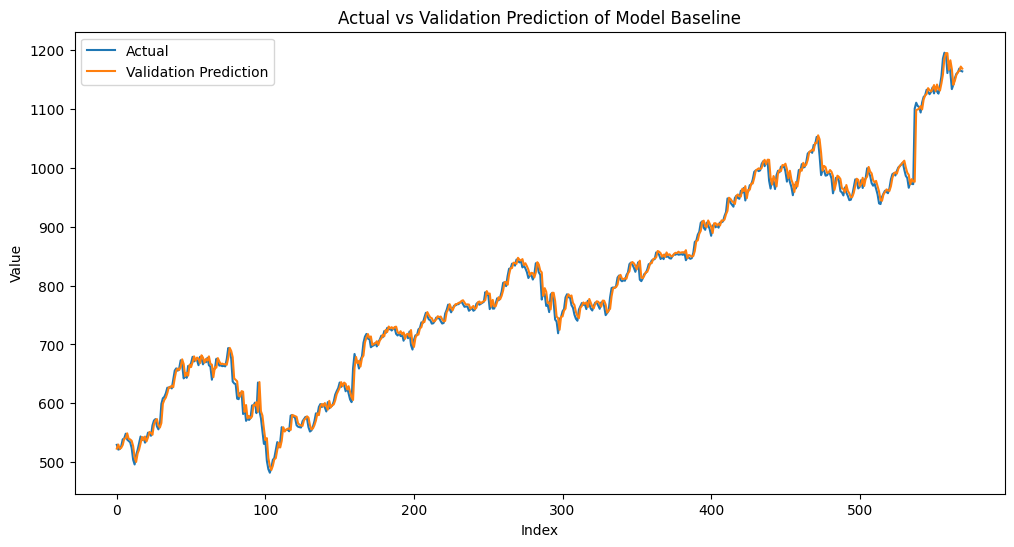

In [426]:
plt.figure(figsize =(12, 6))
plt.plot(y_val_AMZN, label="Actual")
plt.plot(val_predict_AMZN, label="Validation Prediction")
plt.title("Actual vs Validation Prediction of Model Baseline")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

Hasil prediksi menggunakan data validation juga menunjukkan hasil yang cukup bagus karena grafik `Close` yang dihasilkan cukup mirip dengan validation set asli, namun terdapat sedikit pergeseran pada beberapa bagian yang menandakan model tidak berhasil memprediksi bagian-bagian tersebut dengan sempurna.

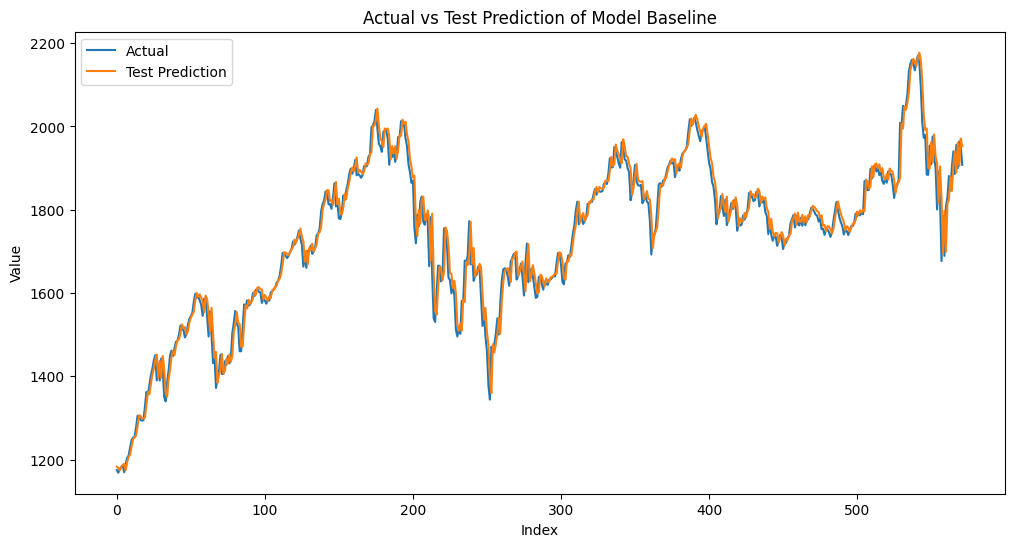

In [427]:
plt.figure(figsize =(12, 6))
plt.plot(y_test_AMZN, label="Actual")
plt.plot(test_predict_AMZN, label="Test Prediction")
plt.title("Actual vs Test Prediction of Model Baseline")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

Hasil prediksi menggunakan data test juga menunjukkan hasil yang cukup bagus karena grafik `Close` yang dihasilkan cukup mirip dengan testing set asli, namun terdapat sedikit pergeseran pada grafik tetapi bentuk grafik masih sama dan tidak terlalu berbeda.

#### **BASELINE MODEL EVALUATION**

In [428]:
x_train_AMZN = x_train_AMZN.reshape((x_train_AMZN.shape[0], window_size, 1))
train_eval_AMZN = model_baseline_AMZN.evaluate(x_train_AMZN, y_train_AMZN)
print(f"Train data - Loss: {train_eval_AMZN[0]}, RMSE: {train_eval_AMZN[1]}, MAE: {train_eval_AMZN[2]}, MAPE: {train_eval_AMZN[3]}")

144/144 [==============================] - 1s 3ms/step - loss: 13.1282 - rmse: 2.7714 - mae: 1.9894 - mape: 2.6221
Train data - Loss: 13.12820053100586, RMSE: 2.7714240550994873, MAE: 1.9893516302108765, MAPE: 2.622135877609253


In [429]:
x_val_AMZN = x_val_AMZN.reshape((x_val_AMZN.shape[0], window_size, 1))
val_eval_AMZN = model_baseline_AMZN.evaluate(x_val_AMZN, y_val_AMZN)
print(f"Validation data - Loss: {val_eval_AMZN[0]}, RMSE: {val_eval_AMZN[1]}, MAE: {val_eval_AMZN[2]}, MAPE: {val_eval_AMZN[3]}")

18/18 [==============================] - 0s 2ms/step - loss: 155.4219 - rmse: 11.7958 - mae: 8.4371 - mape: 1.1168
Validation data - Loss: 155.42185974121094, RMSE: 11.795780181884766, MAE: 8.437146186828613, MAPE: 1.116807460784912


In [430]:
x_test_AMZN = x_test_AMZN.reshape((x_test_AMZN.shape[0], window_size, 1))
test_eval_AMZN = model_baseline_AMZN.evaluate(x_test_AMZN, y_test_AMZN)
print(f"Test data - Loss: {test_eval_AMZN[0]}, RMSE: {test_eval_AMZN[1]}, MAE: {test_eval_AMZN[2]}, MAPE: {test_eval_AMZN[3]}")

18/18 [==============================] - 0s 2ms/step - loss: 1217.9076 - rmse: 31.8775 - mae: 24.3929 - mape: 1.4259
Test data - Loss: 1217.9075927734375, RMSE: 31.877519607543945, MAE: 24.392934799194336, MAPE: 1.4258947372436523


In [431]:
print(f"Train data - Loss (MSE): {train_eval_AMZN[0]}")
print(f"Train data - RMSE: {train_eval_AMZN[1]}")
print(f"Train data - MAE: {train_eval_AMZN[2]}")
print(f"Train data - MAPE: {train_eval_AMZN[3]}")
print("-------------------------------------------------------------------------------------")
print(f"Validation data - Loss (MSE): {val_eval_AMZN[0]}")
print(f"Validation data - RMSE: {val_eval_AMZN[1]}")
print(f"Validation data - MAE: {val_eval_AMZN[2]}")
print(f"Validation data - MAPE: {val_eval_AMZN[3]}")
print("-------------------------------------------------------------------------------------")
print(f"Test data - Loss (MSE): {test_eval_AMZN[0]}")
print(f"Test data - RMSE: {test_eval_AMZN[1]}")
print(f"Test data - MAE: {test_eval_AMZN[2]}")
print(f"Test data - MAPE: {test_eval_AMZN[3]}")

Train data - Loss (MSE): 13.12820053100586
Train data - RMSE: 2.7714240550994873
Train data - MAE: 1.9893516302108765
Train data - MAPE: 2.622135877609253
-------------------------------------------------------------------------------------
Validation data - Loss (MSE): 155.42185974121094
Validation data - RMSE: 11.795780181884766
Validation data - MAE: 8.437146186828613
Validation data - MAPE: 1.116807460784912
-------------------------------------------------------------------------------------
Test data - Loss (MSE): 1217.9075927734375
Test data - RMSE: 31.877519607543945
Test data - MAE: 24.392934799194336
Test data - MAPE: 1.4258947372436523


```
1. Train Data:
Loss : 13.1282
RMSE : 2.7714
MAE : 1.9894
MAPE : 2.6221
```
Dari hasil ini, terlihat bahwa model berperforma cukup baik pada data training dengan nilai error yang rendah. RMSE dan MAE yang relatif kecil, menunjukkan bahwa prediksi model cukup akurat terhadap data training. MAPE menunjukkan bahwa model melakukan kesalahan sekitar 2.6% dalam memprediksi data training.

```
2. Validation Data:
Loss : 155.4218
RMSE : 11.7957
MAE : 8.4371
MAPE : 1.1168
```
Dari hasil ini, terlihat bahwa model lebih susah memprediksi data validation dibandingkan data training. Dapat kita lihat dari Loss (MSE) nya yang jauh lebih tinggi dibandingkan dengan Loss training, sehingga menunjukkan bahwa model melakukan lebih banyak kesalahan saat memprediksi data validasi. Nilai RMSE dan MAE juga relatif kecil, namun lebih tinggi dibandingkan data training menunjukkan adanya variabilitas yang lebih besar dalam memprediksi data validasi. MAPE menunjukkan angka 1.1% yang lebih rendah dibandingkan data training, menunjukkan bahwa tingkat kesalahan yang dilakukan model lebih rendah saat memprediksi data validation.

```
3. Testing Data:
Loss : 1217.9075
RMSE : 31.8775
MAE : 24.3929
MAPE : 1.4258
```
Hasil Loss pada testing data jauh lebih tinggi dibandingkan pada training dan validation set, hal ini menunjukkan bahwa model tidak dapat memprediksi dengan baik pada data baru. RMSE dan MAE pun mengalami kenaikan yang cukup tinggi yang menandakan bahwa model melakukan lebih banyak kesalahan saat memprediksi data testing. Namun, pada MAPE nya menunjukkan bahwa tingkat kesalahan lebih rendah daripada data training.

Model pertama pada data AMAZON menunjukkan bahwa model berhasil belajar dengan baik pada data training, namun saat diberikan data baru, yaitu data validation dan data testing, model kebingungan dan tidak dapat belajar dengan baik sehingga menghasilkan performa yang lebih jelek.

##### **LOSS**

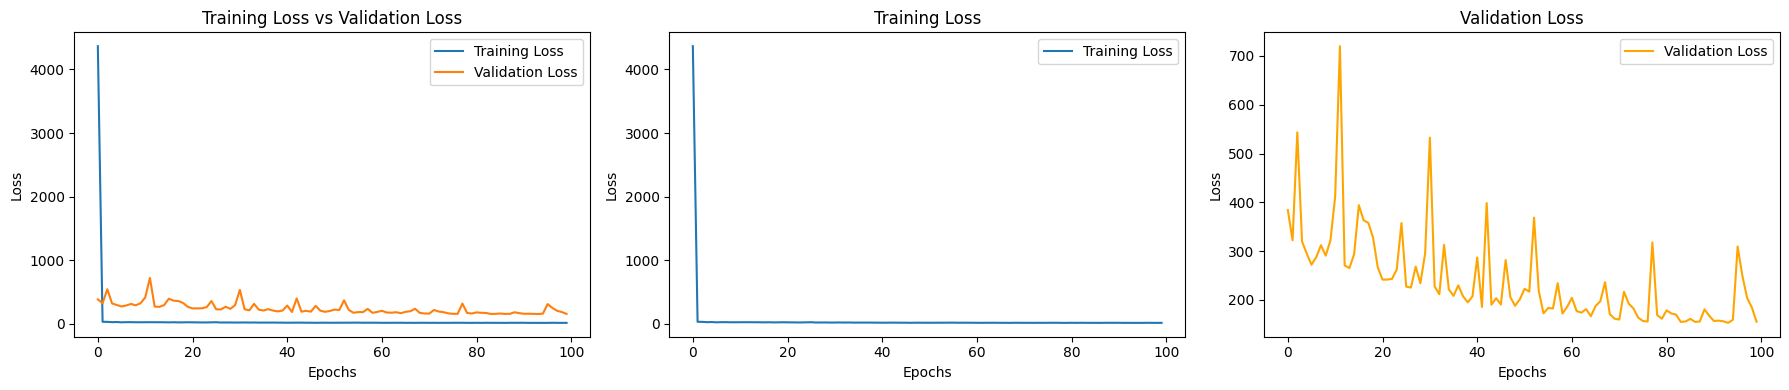

In [432]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(history_baseline_AMZN.history['loss'], label='Training Loss')
axes[0].plot(history_baseline_AMZN.history['val_loss'], label='Validation Loss')
axes[0].set_title("Training Loss vs Validation Loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

axes[1].plot(history_baseline_AMZN.history['loss'], label='Training Loss')
axes[1].set_title("Training Loss")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].legend()

axes[2].plot(history_baseline_AMZN.history['val_loss'], label='Validation Loss', color='orange')
axes[2].set_title("Validation Loss")
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("Loss")
axes[2].legend()

plt.tight_layout()
plt.show()

Loss pada training menurun sangat drastis menunjukkan kemampuan model pada training set yang baik, namun pada validation set, loss nya sangat fluktuatif namun tetap menurun, menunjukkan bahwa pada validation set, model belum bisa belajar terlalu baik dan masih mengalami kebingungan yang ditandai dengan fluktuasi.


##### **RMSE**

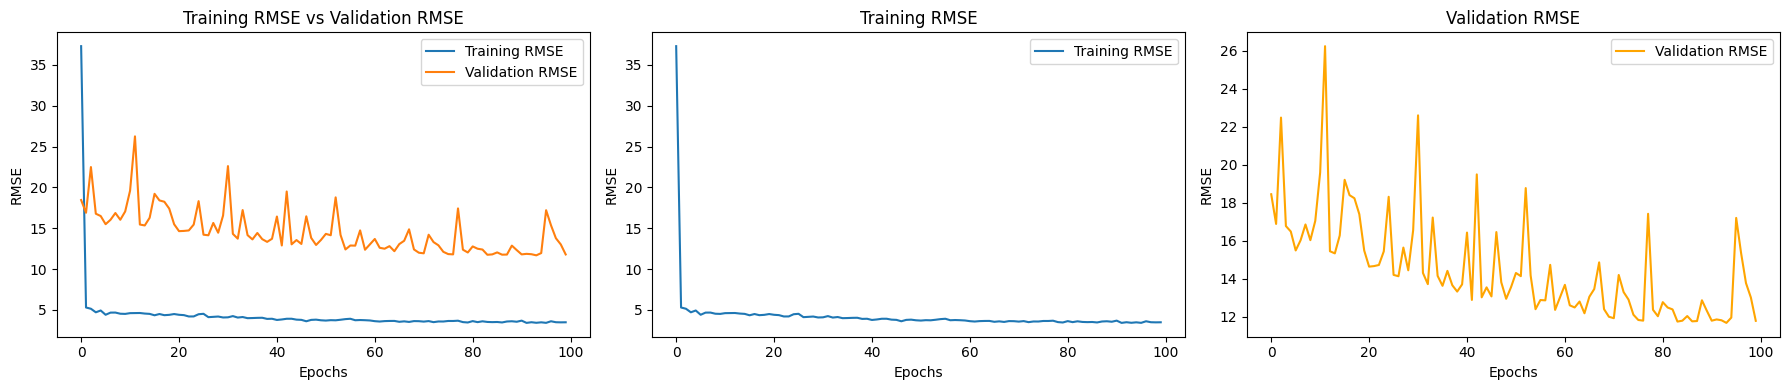

In [433]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(history_baseline_AMZN.history['rmse'], label='Training RMSE')
axes[0].plot(history_baseline_AMZN.history['val_rmse'], label='Validation RMSE')
axes[0].set_title("Training RMSE vs Validation RMSE")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("RMSE")
axes[0].legend()

axes[1].plot(history_baseline_AMZN.history['rmse'], label='Training RMSE')
axes[1].set_title("Training RMSE")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("RMSE")
axes[1].legend()

axes[2].plot(history_baseline_AMZN.history['val_rmse'], label='Validation RMSE', color='orange')
axes[2].set_title("Validation RMSE")
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("RMSE")
axes[2].legend()

plt.tight_layout()
plt.show()

RMSE pada training juga menunjukkan hasil yang sangat bagus, namun RMSE pada validation sangat buruk dan fluktuatif

##### **MAE**

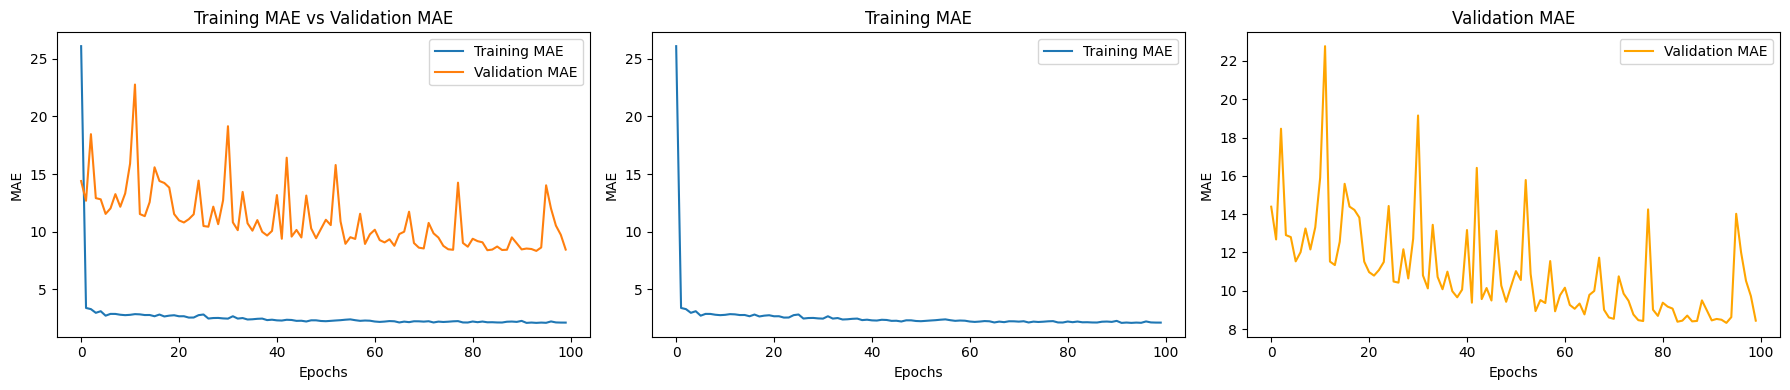

In [434]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(history_baseline_AMZN.history['mae'], label='Training MAE')
axes[0].plot(history_baseline_AMZN.history['val_mae'], label='Validation MAE')
axes[0].set_title("Training MAE vs Validation MAE")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("MAE")
axes[0].legend()

axes[1].plot(history_baseline_AMZN.history['mae'], label='Training MAE')
axes[1].set_title("Training MAE")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("MAE")
axes[1].legend()

axes[2].plot(history_baseline_AMZN.history['val_mae'], label='Validation MAE', color='orange')
axes[2].set_title("Validation MAE")
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("MAE")
axes[2].legend()

plt.tight_layout()
plt.show()

##### **MAPE**

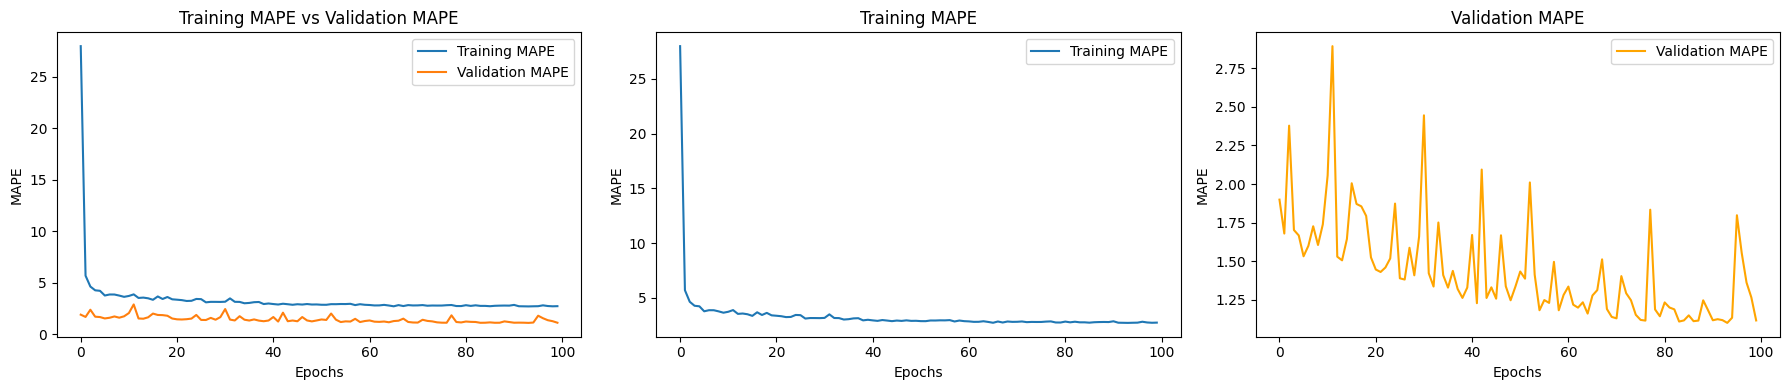

In [435]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(history_baseline_AMZN.history['mape'], label='Training MAPE')
axes[0].plot(history_baseline_AMZN.history['val_mape'], label='Validation MAPE')
axes[0].set_title("Training MAPE vs Validation MAPE")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("MAPE")
axes[0].legend()

# Training MAPE only
axes[1].plot(history_baseline_AMZN.history['mape'], label='Training MAPE')
axes[1].set_title("Training MAPE")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("MAPE")
axes[1].legend()

# Validation MAPE only
axes[2].plot(history_baseline_AMZN.history['val_mape'], label='Validation MAPE', color='orange')
axes[2].set_title("Validation MAPE")
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("MAPE")
axes[2].legend()

plt.tight_layout()
plt.show()

Namun, MAPE pada training dan validation terdapat perbedaan yang signifikan. MAPE pada training mulai dari angka yang tinggi dan turun secara signifikan menandakan bahwa model dapat belajar data training dengan baik. Pada validation set, MAPE dimulai dari angka 5% menunjukkan tingkat kesalahan relatif yang sangat rendah pada validation set, namun tetap saja MAPE terdapat fluktuasi.

Hasil evaluasi menunjukkan bahwa model mengalami overfitting karena menghasilkan performa yang cukup bagus pada training dan validation, namun buruk pada data testing / data baru. Model tidak dapat menggeneralisasi data training dan data validation kepada data baru yang diberikan.

### **2. MODIFICATED MODEL**

Pada model kedua untuk data AMAZON, saya menambahkan hidden input menjadi 60, menambahkan layer Dropout 20% dan menambahkan 1 layer LSTM dengan 40 units.

In [566]:
from tensorflow.keras.regularizers import l1
from tensorflow.keras.layers import LSTM, Dense, Dropout

hidden_units = 60

model_modif_AMZN = Sequential()
model_modif_AMZN.add(LSTM(units=hidden_units, activation='relu', input_shape=(window_size, 1), return_sequences=True))
model_modif_AMZN.add(Dropout(0.2))
model_modif_AMZN.add(LSTM(units=hidden_units - 20, activation='relu'))
model_modif_AMZN.add(Dense(units=horizon))

model_modif_AMZN.build()
model_modif_AMZN.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 5, 60)             14880     
                                                                 
 dropout_5 (Dropout)         (None, 5, 60)             0         
                                                                 
 lstm_27 (LSTM)              (None, 40)                16160     
                                                                 
 dense_21 (Dense)            (None, 1)                 41        
                                                                 
Total params: 31081 (121.41 KB)
Trainable params: 31081 (121.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [567]:
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import MeanAbsoluteError, MeanAbsolutePercentageError, MeanSquaredError

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

optimizer = Adam()

model_modif_AMZN.compile(optimizer=optimizer,
                         loss='mse',
                         metrics=[
                             rmse,
                             MeanAbsoluteError(name='mae'),
                             MeanAbsolutePercentageError(name='mape')])

In [568]:
history_modif_AMZN = model_modif_AMZN.fit(x_train_AMZN, y_train_AMZN,
                             epochs=100,
                             batch_size=32,
                             validation_data=(x_val_AMZN, y_val_AMZN))

Epoch 1/100
144/144 [==============================] - 6s 15ms/step - loss: 4522.5762 - rmse: 43.0198 - mae: 28.2676 - mape: 28.8927 - val_loss: 2852.7993 - val_rmse: 52.5718 - val_mae: 48.8481 - val_mape: 6.1851
Epoch 2/100
144/144 [==============================] - 1s 7ms/step - loss: 162.2280 - rmse: 12.2246 - mae: 7.4182 - mape: 9.8087 - val_loss: 6718.9360 - val_rmse: 80.4550 - val_mae: 77.9109 - val_mape: 9.7250
Epoch 3/100
144/144 [==============================] - 1s 7ms/step - loss: 129.7590 - rmse: 10.9313 - mae: 6.5037 - mape: 7.5047 - val_loss: 5592.0493 - val_rmse: 73.6002 - val_mae: 70.9554 - val_mape: 8.8910
Epoch 4/100
144/144 [==============================] - 1s 7ms/step - loss: 113.8839 - rmse: 10.2124 - mae: 6.1056 - mape: 6.8287 - val_loss: 11410.1406 - val_rmse: 105.0853 - val_mae: 102.9558 - val_mape: 12.8976
Epoch 5/100
144/144 [==============================] - 1s 7ms/step - loss: 100.4598 - rmse: 9.5898 - mae: 5.6966 - mape: 6.4009 - val_loss: 12401.9150 - val

In [570]:
x_test_AMZN = x_test_AMZN.reshape((x_test_AMZN.shape[0], x_test_AMZN.shape[1], 1))

train_predict_modif_AMZN = model_modif_AMZN.predict(x_train_AMZN)
val_predict_modif_AMZN = model_modif_AMZN.predict(x_val_AMZN)
test_predict_modif_AMZN = model_modif_AMZN.predict(x_test_AMZN)

print(train_predict_modif_AMZN.shape, val_predict_modif_AMZN.shape, test_predict_modif_AMZN.shape)

18/18 [==============================] - 0s 4ms/step
(4601, 1) (570, 1) (572, 1)


### **PLOT PREDICTION**

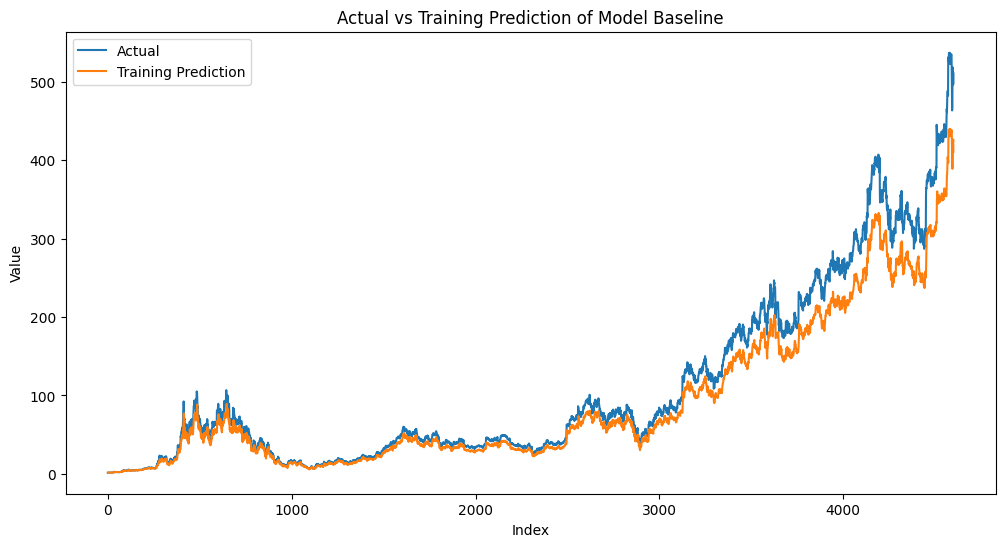

In [571]:
plt.figure(figsize =(12, 6))
plt.plot(y_train_AMZN, label="Actual")
plt.plot(train_predict_modif_AMZN, label="Training Prediction")
plt.title("Actual vs Training Prediction of Model Baseline")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

Hasil prediksi pada data training menggunakan model yang dimodifikasi menunjukkan performa yang buruk yang dapat kita lihat dari grafik prediction yang menyimpan dari data training aslinya.

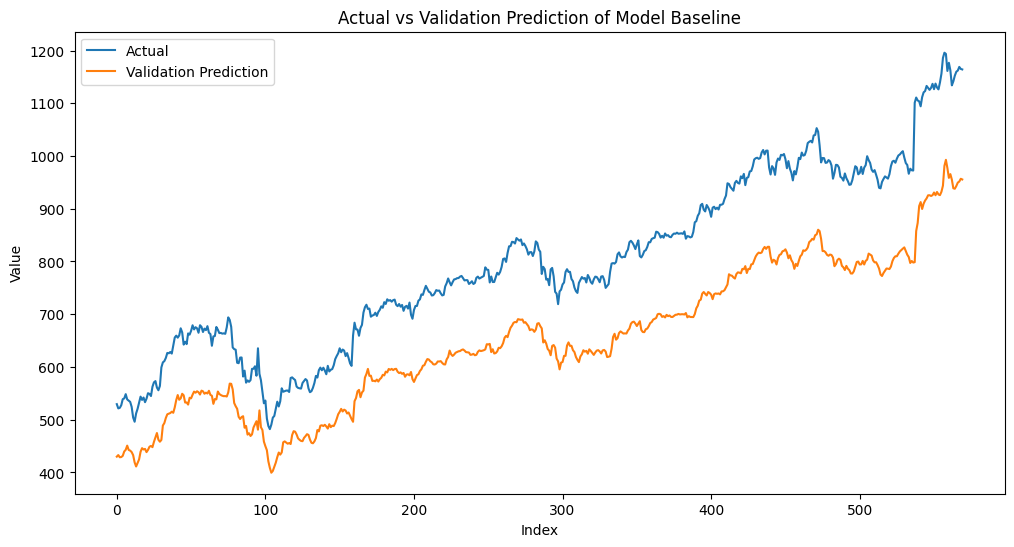

In [572]:
plt.figure(figsize =(12, 6))
plt.plot(y_val_AMZN, label="Actual")
plt.plot(val_predict_modif_AMZN, label="Validation Prediction")
plt.title("Actual vs Validation Prediction of Model Baseline")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

Hasil prediksi data validation bahkan menyimpang ke bawah dibandingkan dengan data training. Pola yang dihasilkan sama, namun terlalu menyimpang ke bawah. Menunjukkan bahwa model tidak dapat belajar datanya dengan baik

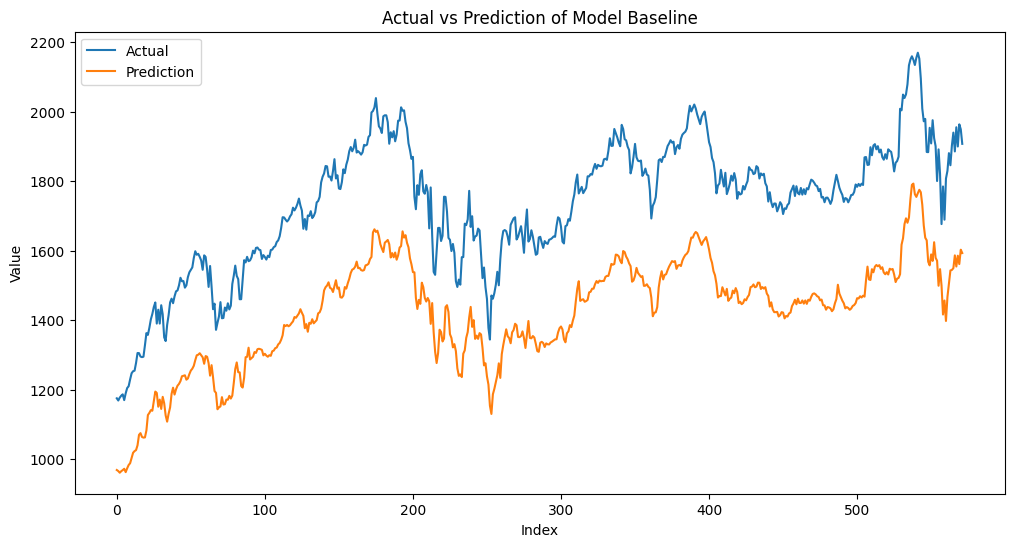

In [573]:
plt.figure(figsize =(12, 6))
plt.plot(y_test_AMZN, label="Actual")
plt.plot(test_predict_modif_AMZN, label="Prediction")
plt.title("Actual vs Prediction of Model Baseline")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

Sama seperti data training dan validation, model tidak dapat memprediksi dengan baik pada testing set.

#### **MODIFICATED MODEL EVALUATION**

In [574]:
x_train_AMZN = x_train_AMZN.reshape((x_train_AMZN.shape[0], window_size, 1))
train_eval_modif_AMZN = model_modif_AMZN.evaluate(x_train_AMZN, y_train_AMZN)
print(f"Train data - Loss: {train_eval_modif_AMZN[0]}, RMSE: {train_eval_modif_AMZN[1]}, MAE: {train_eval_modif_AMZN[2]}, MAPE: {train_eval_modif_AMZN[3]}")

144/144 [==============================] - 0s 3ms/step - loss: 800.8719 - rmse: 19.1096 - mae: 18.7192 - mape: 14.8857
Train data - Loss: 800.8718872070312, RMSE: 19.109628677368164, MAE: 18.719186782836914, MAPE: 14.885729789733887


In [575]:
x_val_AMZN = x_val_AMZN.reshape((x_val_AMZN.shape[0], window_size, 1))
val_eval_modif_AMZN = model_modif_AMZN.evaluate(x_val_AMZN, y_val_AMZN)
print(f"Validation data - Loss: {val_eval_modif_AMZN[0]}, RMSE: {val_eval_modif_AMZN[1]}, MAE: {val_eval_modif_AMZN[2]}, MAPE: {val_eval_modif_AMZN[3]}")

18/18 [==============================] - 0s 3ms/step - loss: 21852.1035 - rmse: 145.2736 - mae: 144.0232 - mape: 18.0481
Validation data - Loss: 21852.103515625, RMSE: 145.2736358642578, MAE: 144.02316284179688, MAPE: 18.048084259033203


In [576]:
x_test_AMZN = x_test_AMZN.reshape((x_test_AMZN.shape[0], window_size, 1))
test_eval_modif_AMZN = model_modif_AMZN.evaluate(x_test_AMZN, y_test_AMZN)
print(f"Test data - Loss: {test_eval_modif_AMZN[0]}, RMSE: {test_eval_modif_AMZN[1]}, MAE: {test_eval_modif_AMZN[2]}, MAPE: {test_eval_modif_AMZN[3]}")

18/18 [==============================] - 0s 3ms/step - loss: 99235.9062 - rmse: 313.6465 - mae: 311.6699 - mape: 17.9602
Test data - Loss: 99235.90625, RMSE: 313.6465148925781, MAE: 311.66986083984375, MAPE: 17.960233688354492


In [577]:
print(f"Train data - Loss (MSE): {train_eval_modif_AMZN[0]}")
print(f"Train data - RMSE: {train_eval_modif_AMZN[1]}")
print(f"Train data - MAE: {train_eval_modif_AMZN[2]}")
print(f"Train data - MAPE: {train_eval_modif_AMZN[3]}")
print("-------------------------------------------------------------------------------------")
print(f"Validation data - Loss (MSE): {val_eval_modif_AMZN[0]}")
print(f"Validation data - RMSE: {val_eval_modif_AMZN[1]}")
print(f"Validation data - MAE: {val_eval_modif_AMZN[2]}")
print(f"Validation data - MAPE: {val_eval_modif_AMZN[3]}")
print("-------------------------------------------------------------------------------------")
print(f"Test data - Loss (MSE): {test_eval_modif_AMZN[0]}")
print(f"Test data - RMSE: {test_eval_modif_AMZN[1]}")
print(f"Test data - MAE: {test_eval_modif_AMZN[2]}")
print(f"Test data - MAPE: {test_eval_modif_AMZN[3]}")

Train data - Loss (MSE): 800.8718872070312
Train data - RMSE: 19.109628677368164
Train data - MAE: 18.719186782836914
Train data - MAPE: 14.885729789733887
-------------------------------------------------------------------------------------
Validation data - Loss (MSE): 21852.103515625
Validation data - RMSE: 145.2736358642578
Validation data - MAE: 144.02316284179688
Validation data - MAPE: 18.048084259033203
-------------------------------------------------------------------------------------
Test data - Loss (MSE): 99235.90625
Test data - RMSE: 313.6465148925781
Test data - MAE: 311.66986083984375
Test data - MAPE: 17.960233688354492




```
1. Training Data
Loss : 800.8718
RMSE : 19.1096
MAE : 18.7191
MAPE : 14.8857
```
Loss MSE yang dihasilkan pada training data menunjukkan angka yang sangat tinggi dan jauh lebih tinggi dibandingkan model pertama. Hal ini menunjukkan bahwa model kedua memiliki tingkat kesalah yang lebih besar pada data training. Nilai RMSE dan MAE juga jauh lebih tinggi dibandingkan dengan model pertama menunjukkan adanya variabilitas yang lebih besar dalam model kedua.

```
2. Validation Data
Loss : 21852.1035
RMSE : 145.2736
MAE : 144.0232
MAPE : 18.0481
```
Semua nilai metrik yang dihasilkan menunjukkan performa yang jauh lebih buruk dibandingkan dengan data training dan model pertama.

```
3. Testing Data
Loss : 99235.9063
RMSE : 313.6465
MAE : 311.6699
MAPE : 17.9602
```
Semua nilai metrik yang dihasilkan menunjukkan performa yang jauh lebih buruk dibandingkan dengan data training dan model pertama.



##### **LOSS**

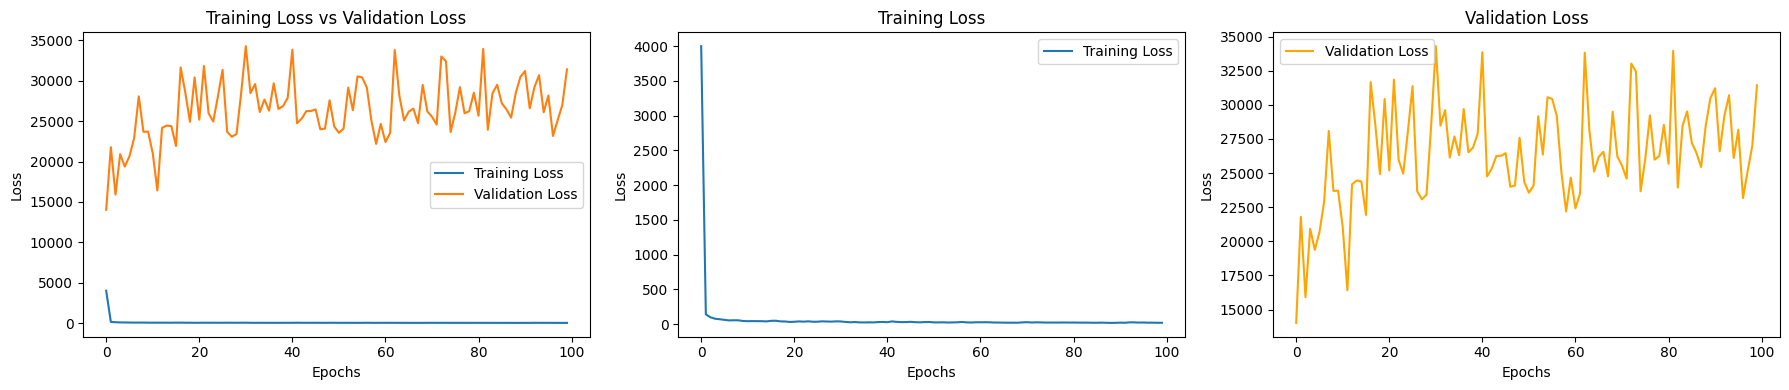

In [548]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(history_modif_AMZN.history['loss'], label='Training Loss')
axes[0].plot(history_modif_AMZN.history['val_loss'], label='Validation Loss')
axes[0].set_title("Training Loss vs Validation Loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

axes[1].plot(history_modif_AMZN.history['loss'], label='Training Loss')
axes[1].set_title("Training Loss")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].legend()

axes[2].plot(history_modif_AMZN.history['val_loss'], label='Validation Loss', color='orange')
axes[2].set_title("Validation Loss")
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("Loss")
axes[2].legend()

plt.tight_layout()
plt.show()

##### **RMSE**

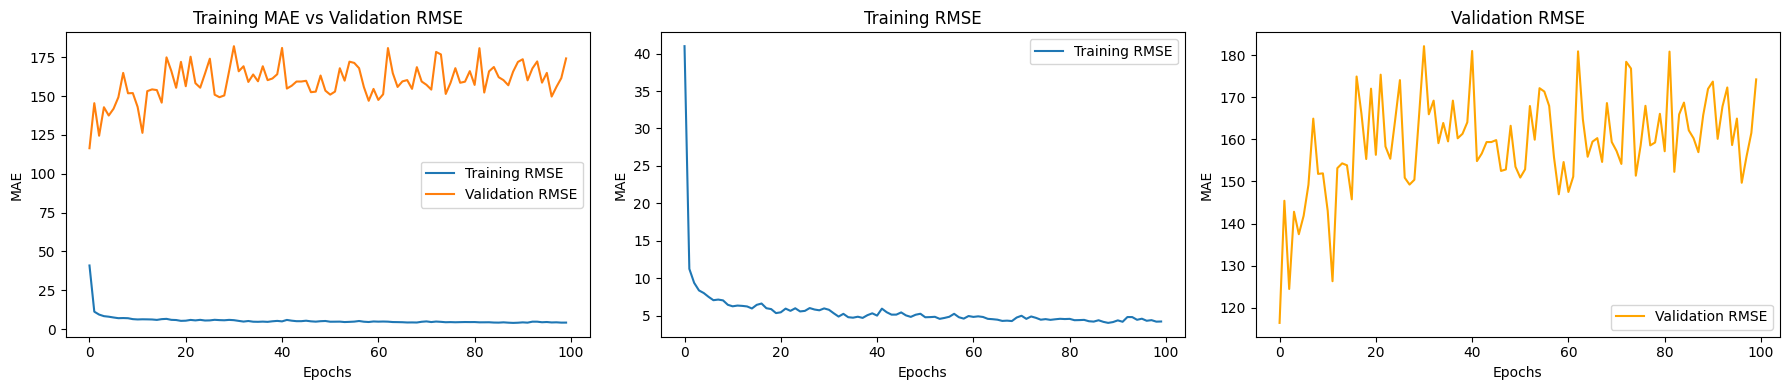

In [549]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(history_modif_AMZN.history['rmse'], label='Training RMSE')
axes[0].plot(history_modif_AMZN.history['val_rmse'], label='Validation RMSE')
axes[0].set_title("Training MAE vs Validation RMSE")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("MAE")
axes[0].legend()

axes[1].plot(history_modif_AMZN.history['rmse'], label='Training RMSE')
axes[1].set_title("Training RMSE")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("MAE")
axes[1].legend()

axes[2].plot(history_modif_AMZN.history['val_rmse'], label='Validation RMSE', color='orange')
axes[2].set_title("Validation RMSE")
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("MAE")
axes[2].legend()

plt.tight_layout()
plt.show()

##### **MAE**

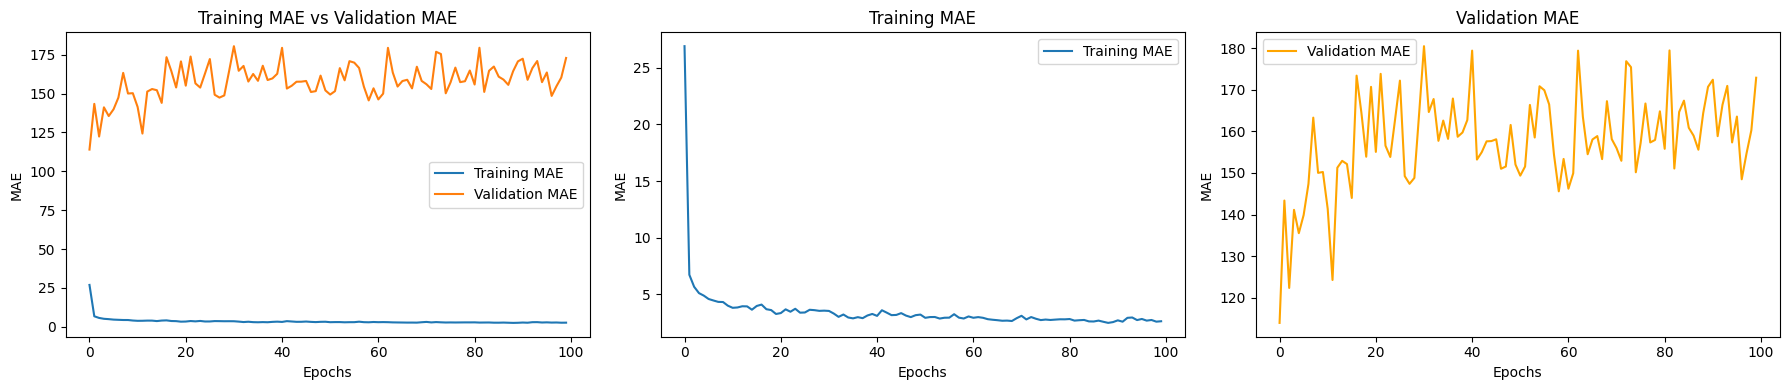

In [550]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(history_modif_AMZN.history['mae'], label='Training MAE')
axes[0].plot(history_modif_AMZN.history['val_mae'], label='Validation MAE')
axes[0].set_title("Training MAE vs Validation MAE")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("MAE")
axes[0].legend()

axes[1].plot(history_modif_AMZN.history['mae'], label='Training MAE')
axes[1].set_title("Training MAE")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("MAE")
axes[1].legend()

axes[2].plot(history_modif_AMZN.history['val_mae'], label='Validation MAE', color='orange')
axes[2].set_title("Validation MAE")
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("MAE")
axes[2].legend()

plt.tight_layout()
plt.show()

##### **MAPE**

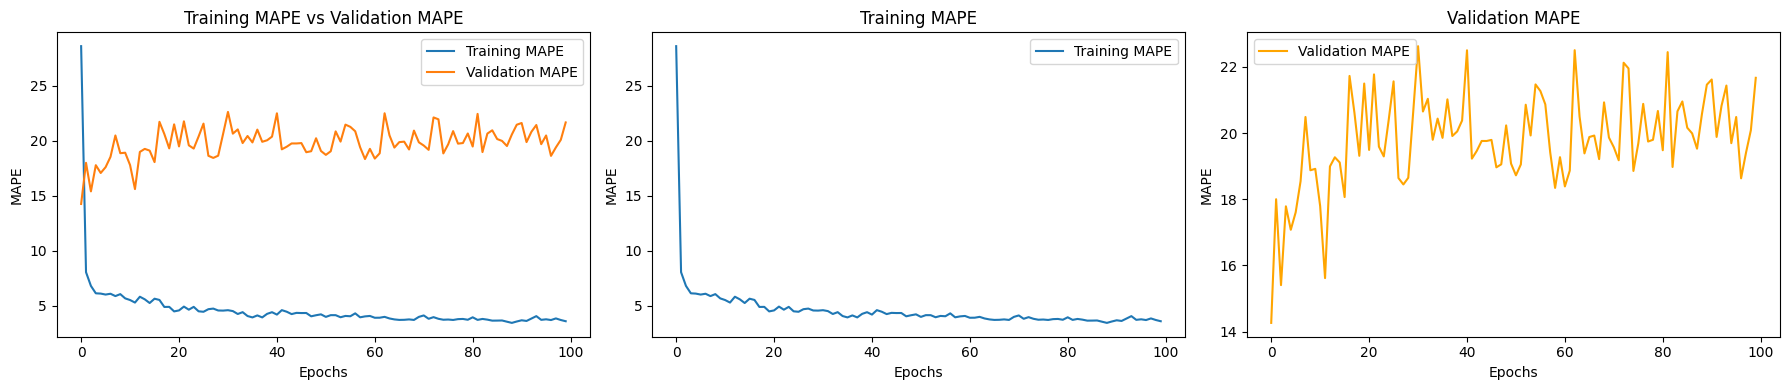

In [551]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(history_modif_AMZN.history['mape'], label='Training MAPE')
axes[0].plot(history_modif_AMZN.history['val_mape'], label='Validation MAPE')
axes[0].set_title("Training MAPE vs Validation MAPE")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("MAPE")
axes[0].legend()

# Training MAPE only
axes[1].plot(history_modif_AMZN.history['mape'], label='Training MAPE')
axes[1].set_title("Training MAPE")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("MAPE")
axes[1].legend()

# Validation MAPE only
axes[2].plot(history_modif_AMZN.history['val_mape'], label='Validation MAPE', color='orange')
axes[2].set_title("Validation MAPE")
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("MAPE")
axes[2].legend()

plt.tight_layout()
plt.show()

# **AMAZON MODEL COMPARISON**

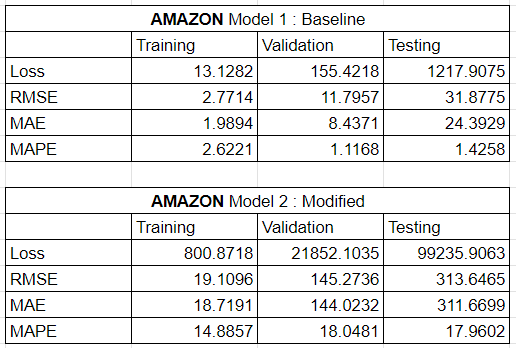

Secara keseluruhan, kedua model tidak dapat memprediksi dengan baik pada data testing, namun model 1 (baseline) menunjukkan performa yang jauh lebih baik pada ketiga set. Hal ini menunjukkan bahwa kedua model mengalami overfitting yang mungkin disebabkan karena tidak dilakukannya scaling di awal.

Salah satu penyebab overfitting adalah tidak dilakukannya scaling pada data di awal. Scaling dapat membantu model untuk belajar lebih efektif dengan meratakan distribusi data. Selain itu, data saham, seperti data AMAZON, cenderung tidak berpola dan bisa mengalami perubahan drastis, yang membuat model lebih sulit untuk memprediksi dengan akurat.

Setelah melakukan modifikasi pada model kedua, yaitu menambahkan jumlah units pada LSTM, menambahkan layer Dropout dan 1 layer LSTM, menghasilkan performa yang lebih buruk. Hal ini menunjukkan bahwa data AMAZON lebih baik diprediksi menggunakan arsitektur yang lebih sederhana.

# **2.CSCO**

## **DATA UNDERSTANDING**

In [451]:
CSCO.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-26,37.970001,40.919998,37.369999,40.580002,40.580002,38473300
2020-03-27,39.209999,40.150002,38.410000,38.820000,38.820000,31278600
2020-03-30,39.450001,40.490002,38.959999,40.320000,40.320000,27120300
2020-03-31,40.130001,40.419998,39.110001,39.310001,39.310001,26014200
2020-04-01,38.169998,38.860001,37.869999,38.330002,38.330002,26773900


In [452]:
CSCO_df = pd.read_csv('CSCO.csv')

print("CISCO :")
print("Starting date: ",CSCO_df.iloc[0][0])
print("Ending date: ", CSCO_df.iloc[-1][0])

CISCO :
Starting date:  1990-02-16
Ending date:  2020-04-01


In [453]:
CSCO.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7589 entries, 1990-02-16 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7589 non-null   float64
 1   High       7589 non-null   float64
 2   Low        7589 non-null   float64
 3   Close      7589 non-null   float64
 4   Adj Close  7589 non-null   float64
 5   Volume     7589 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 415.0 KB


In [454]:
CSCO.shape

(7589, 6)

Drop kolom yang tidak digunakan

In [618]:
CSCO = CSCO.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1)
CSCO.head()

,Close
Date,
1990-02-16,0.077257
1990-02-20,0.079861
1990-02-21,0.078125
1990-02-22,0.078993
1990-02-23,0.078559


In [456]:
CSCO.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7589 entries, 1990-02-16 to 2020-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   7589 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB


In [457]:
CSCO.isna().sum()

Close    0
dtype: int64

No missing values found

In [458]:
CSCO.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,7589.0,20.399541,14.906589,0.071181,8.479167,19.68,27.120001,80.0625


### **PLOTTING**

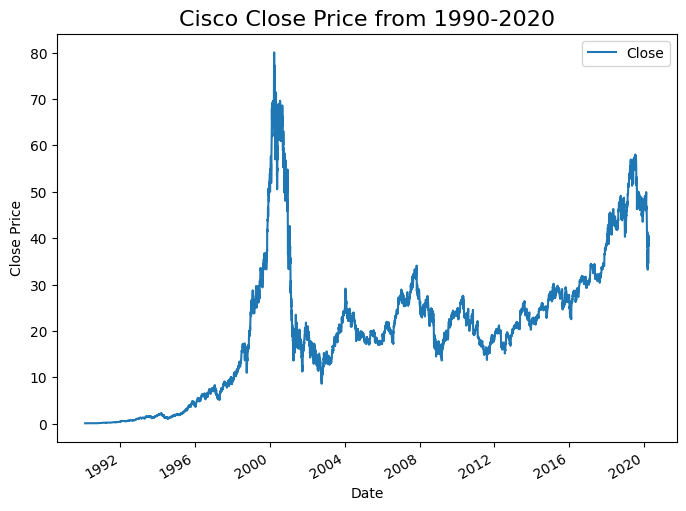

In [459]:
import matplotlib.pyplot as plt

# Plotting the time series
CSCO.plot(figsize=(8, 6))
plt.title('Cisco Close Price from 1990-2020',fontsize=16)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

Untuk perusahaan CISCO, analisa saham dimulai sejak tahun 1990 yang menunjukkan Close Price di angka 0, lalu sekitar tahun 2000, saham mulai mengalami kenaikan drastis dan menurun di 2002, namun setelah itu mengalami kenaikan yang stabil.

## **SPLIT DATA**

In [460]:
window_size = 5
horizon = 1

In [619]:
time_step = CSCO.index.to_numpy()
close_price = CSCO['Close'].values.astype('float32')
time_step[:window_size], close_price[:window_size]

(array(['1990-02-16T00:00:00.000000000', '1990-02-20T00:00:00.000000000',
        '1990-02-21T00:00:00.000000000', '1990-02-22T00:00:00.000000000',
        '1990-02-23T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([0.07725695, 0.07986111, 0.078125  , 0.07899305, 0.07855903],
       dtype=float32))

In [620]:
total_size = len(close_price)
train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)
print('Total length of the data :', total_size)
print('Training set length :', train_size)
print('Validation set length :', val_size)
print('Testing set length :', total_size-train_size-val_size)

Total length of the data : 7589
Training set length : 6071
Validation set length : 758
Testing set length : 760


In [621]:
train_time_CSCO, train_prices_CSCO = time_step[:train_size], close_price[:train_size]
val_time_CSCO, val_prices_CSCO = time_step[train_size:train_size + val_size], close_price[train_size:train_size + val_size]
test_time_CSCO, test_prices_CSCO = time_step[train_size + val_size:], close_price[train_size + val_size:]

print("Train :", len(train_time_CSCO), len(train_prices_CSCO))
print("Validation :", len(val_time_CSCO), len(val_prices_CSCO))
print("Test :", len(test_time_CSCO), len(test_prices_CSCO))

Train : 6071 6071
Validation : 758 758
Test : 760 760


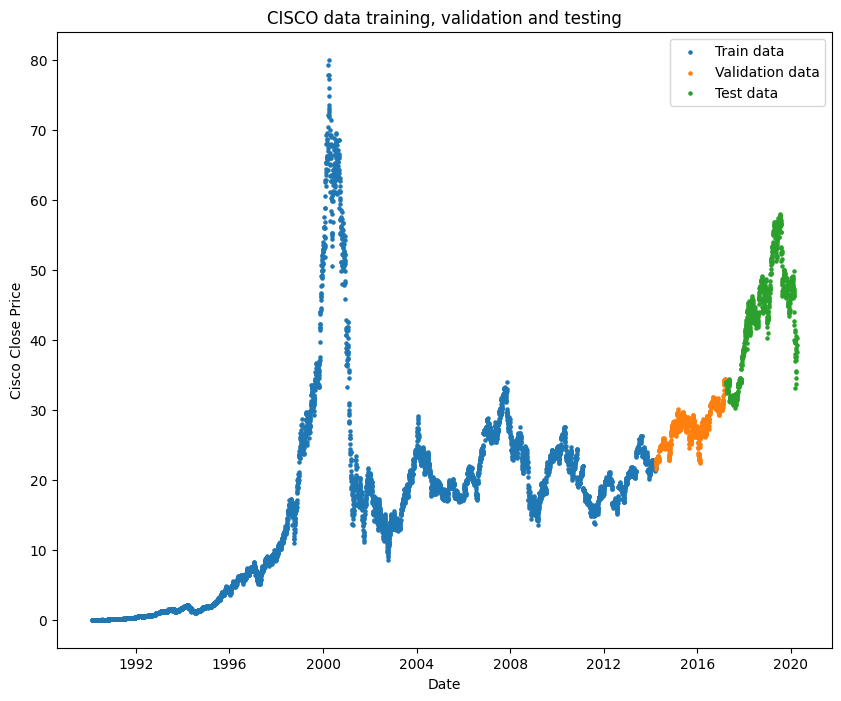

In [622]:
plt.figure(figsize=(10, 8))
plt.scatter(train_time_CSCO, train_prices_CSCO, s=5, label="Train data")
plt.scatter(val_time_CSCO, val_prices_CSCO, s=5, label='Validation data')
plt.scatter(test_time_CSCO, test_prices_CSCO, s=5, label="Test data")
plt.title("CISCO data training, validation and testing")
plt.xlabel('Date')
plt.ylabel('Cisco Close Price')
plt.legend()
plt.show()

### **PREPROCESSING**

### **CREATING DATASET**

Berdasarkan `window_size` dan `horizon` yang sudah dideklarasikan di atas

In [623]:
def create_dataset(dataset, window_size, horizon):
    X, y = [], []
    for i in range(len(dataset) - window_size - horizon + 1):
        feature = dataset[i:i + window_size]
        target = dataset[i + window_size:i + window_size + horizon]
        X.append(feature)
        y.append(target)
    return np.array(X), np.array(y)

In [624]:
x_train_CSCO, y_train_CSCO = create_dataset(train_prices_CSCO, window_size, horizon)
x_val_CSCO, y_val_CSCO = create_dataset(val_prices_CSCO, window_size, horizon)
x_test_CSCO, y_test_CSCO = create_dataset(test_prices_CSCO, window_size, horizon)

print("Train :", x_train_CSCO.shape, y_train_CSCO.shape)
print('Validation :', x_val_CSCO.shape, y_val_CSCO.shape)
print('Test :', x_test_CSCO.shape, y_test_CSCO.shape)

Train : (6066, 5) (6066, 1)
Validation : (753, 5) (753, 1)
Test : (755, 5) (755, 1)


#### **SCALING**

In [468]:
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# x_train_CSCO = scaler.fit_transform(x_train_CSCO)
# x_val_CSCO = scaler.transform(x_val_CSCO)
# x_test_CSCO = scaler.transform(x_test_CSCO)

Scaling tidak digunakan karena setelah saya menggunakan scaling, hasil model menunjukkan performa yang lebih buruk dibandingkan sebelum discaling. Maka saya memutuskan untuk tidak menggunakan scaling.

## **LSTM MODEL**

In [625]:
## LSTM BUTUH RESHAPE [samples, time steps, features]
x_train_CSCO = x_train_CSCO.reshape((x_train_CSCO.shape[0], x_train_CSCO.shape[1], 1))
x_val_CSCO = x_val_CSCO.reshape((x_val_CSCO.shape[0], x_val_CSCO.shape[1], 1))
x_test_CSCO = x_test_CSCO.reshape((x_test_CSCO.shape[0], x_test_CSCO.shape[1], 1))

In [626]:
print('Train :', x_train_CSCO.shape, y_train_CSCO.shape)
print('Validation :', x_val_CSCO.shape, y_val_CSCO.shape)
print('Test :', x_test_CSCO.shape, y_test_CSCO.shape)

Train : (6066, 5, 1) (6066, 1)
Validation : (753, 5, 1) (753, 1)
Test : (755, 5, 1) (755, 1)


### **1. BASELINE MODEL**

Buatlah arsitektur baseline dengan LSTM (units=50) dan layer akhir berupa node Perceptron dengan units=1. Activation function untuk LSTM menggunakan ReLU

In [471]:
from tensorflow.keras.layers import LSTM, Dense

hidden_units = 50

model_baseline_CSCO = Sequential()
model_baseline_CSCO.add(LSTM(units=hidden_units, activation='relu', input_shape=(window_size, 1)))
model_baseline_CSCO.add(Dense(units=horizon))

model_baseline_CSCO.build()
model_baseline_CSCO.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 50)                10400     
                                                                 
 dense_18 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [472]:
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import MeanAbsoluteError, MeanAbsolutePercentageError, MeanSquaredError

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

optimizer = Adam()

model_baseline_CSCO.compile(optimizer=optimizer,
                         loss='mse',
                         metrics=[
                             rmse,
                             MeanAbsoluteError(name='mae'),
                             MeanAbsolutePercentageError(name='mape')])

In [473]:
history_baseline_CSCO = model_baseline_CSCO.fit(x_train_CSCO, y_train_CSCO,
                             epochs=100,
                             batch_size=32,
                             validation_data=(x_val_CSCO, y_val_CSCO))

Epoch 1/100
190/190 [==============================] - 4s 9ms/step - loss: 28.7633 - rmse: 2.8940 - mae: 2.2126 - mape: 21.0281 - val_loss: 0.4824 - val_rmse: 0.6637 - val_mae: 0.5585 - val_mape: 2.0036
Epoch 2/100
190/190 [==============================] - 1s 7ms/step - loss: 1.0040 - rmse: 0.9312 - mae: 0.5502 - mape: 4.7067 - val_loss: 0.3734 - val_rmse: 0.5744 - val_mae: 0.4709 - val_mape: 1.7129
Epoch 3/100
190/190 [==============================] - 1s 7ms/step - loss: 0.9078 - rmse: 0.8855 - mae: 0.5226 - mape: 4.2367 - val_loss: 0.2796 - val_rmse: 0.4924 - val_mae: 0.3799 - val_mape: 1.3903
Epoch 4/100
190/190 [==============================] - 1s 4ms/step - loss: 0.7926 - rmse: 0.8315 - mae: 0.4973 - mape: 4.4816 - val_loss: 0.2574 - val_rmse: 0.4786 - val_mae: 0.3913 - val_mape: 1.4288
Epoch 5/100
190/190 [==============================] - 1s 4ms/step - loss: 0.6187 - rmse: 0.7403 - mae: 0.4404 - mape: 3.6996 - val_loss: 0.1937 - val_rmse: 0.4106 - val_mae: 0.3235 - val_mape: 

In [474]:
x_test_CSCO = x_test_CSCO.reshape((x_test_CSCO.shape[0], x_test_CSCO.shape[1], 1))

train_predict_CSCO = model_baseline_CSCO.predict(x_train_CSCO)
val_predict_CSCO = model_baseline_CSCO.predict(x_val_CSCO)
test_predict_CSCO = model_baseline_CSCO.predict(x_test_CSCO)

print(train_predict_CSCO.shape, val_predict_CSCO.shape, test_predict_CSCO.shape)

24/24 [==============================] - 0s 2ms/step
(6066, 1) (753, 1) (755, 1)


### **PLOT PREDICTION**

Membandingkan hasil prediction dengan dataset asli

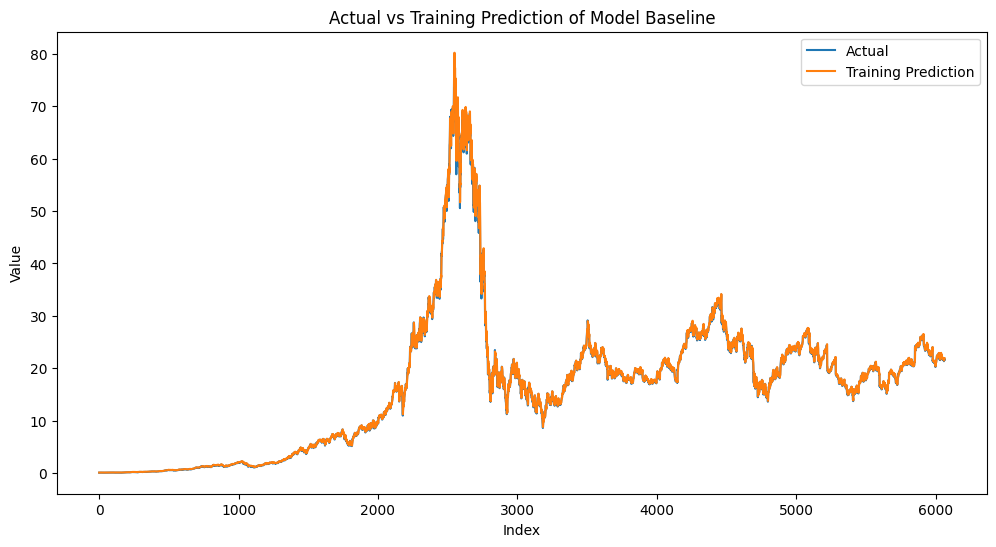

In [475]:
plt.figure(figsize =(12, 6))
plt.plot(y_train_CSCO, label="Actual")
plt.plot(train_predict_CSCO, label="Training Prediction")
plt.title("Actual vs Training Prediction of Model Baseline")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

Hasil prediksi pada data training menunjukkan hasil yang sangat bagus karena grafik yang ditunjukkan menunjukkan hasil prediksi yang sangat mirip dengan data training asli.

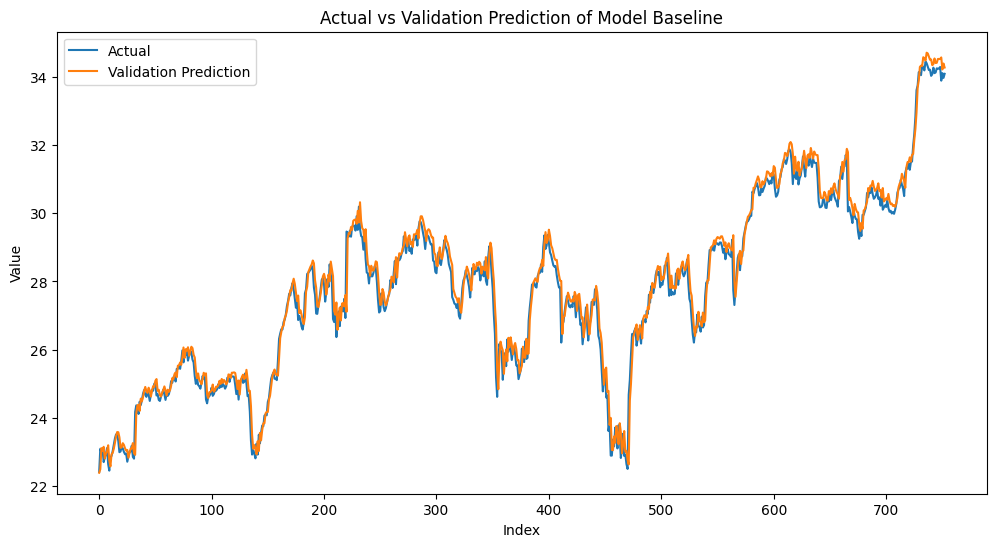

In [476]:
plt.figure(figsize =(12, 6))
plt.plot(y_val_CSCO, label="Actual")
plt.plot(val_predict_CSCO, label="Validation Prediction")
plt.title("Actual vs Validation Prediction of Model Baseline")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

Pada data validation, model tidak dapat memprediksi data sebaik data training, namun hasil prediksi data validation tidak terlalu buruk dibandingkan dengan model modified AMAZON.

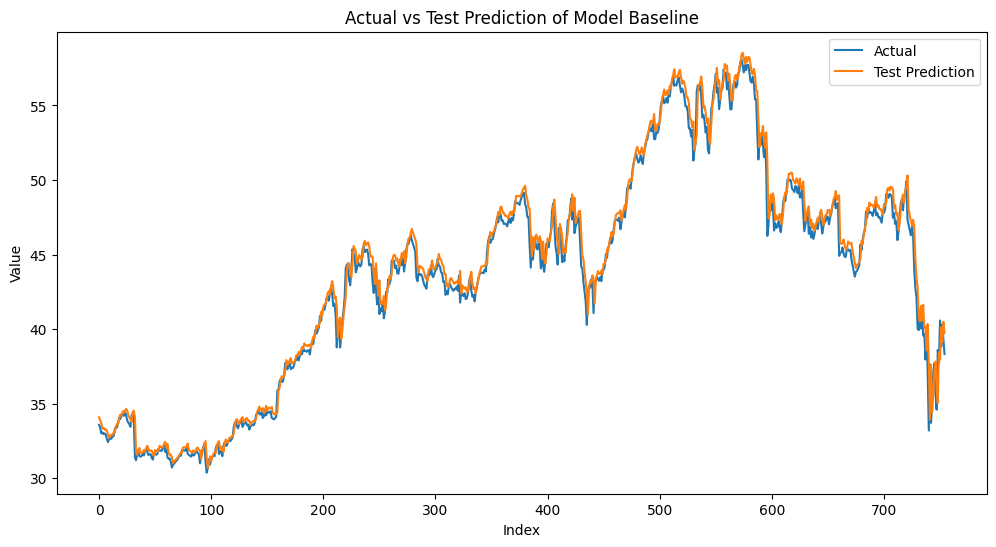

In [477]:
plt.figure(figsize =(12, 6))
plt.plot(y_test_CSCO, label="Actual")
plt.plot(test_predict_CSCO, label="Test Prediction")
plt.title("Actual vs Test Prediction of Model Baseline")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

Hasil prediksi data testing menunjukkan bahwa model tidak cukup baik memprediksi data baru / data testing, dapat dilihat dengan grafik prediksi yang menyimpang dari data aslinya.

#### **BASELINE MODEL EVALUATION**

In [478]:
x_train_CSCO = x_train_CSCO.reshape((x_train_CSCO.shape[0], window_size, 1))
train_eval_CSCO = model_baseline_CSCO.evaluate(x_train_CSCO, y_train_CSCO)
print(f"Train data - Loss: {train_eval_CSCO[0]}, RMSE: {train_eval_CSCO[1]}, MAE: {train_eval_CSCO[2]}, MAPE: {train_eval_CSCO[3]}")

190/190 [==============================] - 0s 2ms/step - loss: 0.4505 - rmse: 0.4292 - mae: 0.3344 - mape: 3.3343
Train data - Loss: 0.4504530131816864, RMSE: 0.4292137026786804, MAE: 0.33438146114349365, MAPE: 3.3343491554260254


In [479]:
x_val_CSCO = x_val_CSCO.reshape((x_val_CSCO.shape[0], window_size, 1))
val_eval_CSCO = model_baseline_CSCO.evaluate(x_val_CSCO, y_val_CSCO)
print(f"Validation data - Loss: {val_eval_CSCO[0]}, RMSE: {val_eval_CSCO[1]}, MAE: {val_eval_CSCO[2]}, MAPE: {val_eval_CSCO[3]}")

24/24 [==============================] - 0s 3ms/step - loss: 0.1443 - rmse: 0.3631 - mae: 0.2795 - mape: 1.0186
Validation data - Loss: 0.14432887732982635, RMSE: 0.3631099760532379, MAE: 0.279466837644577, MAPE: 1.0185688734054565


In [480]:
x_test_CSCO = x_test_CSCO.reshape((x_test_CSCO.shape[0], window_size, 1))
test_eval_CSCO = model_baseline_CSCO.evaluate(x_test_CSCO, y_test_CSCO)
print(f"Test data - Loss: {test_eval_CSCO[0]}, RMSE: {test_eval_CSCO[1]}, MAE: {test_eval_CSCO[2]}, MAPE: {test_eval_CSCO[3]}")

24/24 [==============================] - 0s 3ms/step - loss: 0.7907 - rmse: 0.8204 - mae: 0.6148 - mape: 1.4153
Test data - Loss: 0.7906985878944397, RMSE: 0.8203597068786621, MAE: 0.6147521734237671, MAPE: 1.4153085947036743


In [481]:
print(f"Train data - Loss (MSE): {train_eval_CSCO[0]}")
print(f"Train data - RMSE: {train_eval_CSCO[1]}")
print(f"Train data - MAE: {train_eval_CSCO[2]}")
print(f"Train data - MAPE: {train_eval_CSCO[3]}")
print("-------------------------------------------------------------------------------------")
print(f"Validation data - Loss (MSE): {val_eval_CSCO[0]}")
print(f"Validation data - RMSE: {val_eval_CSCO[1]}")
print(f"Validation data - MAE: {val_eval_CSCO[2]}")
print(f"Validation data - MAPE: {val_eval_CSCO[3]}")
print("-------------------------------------------------------------------------------------")
print(f"Test data - Loss (MSE): {test_eval_CSCO[0]}")
print(f"Test data - RMSE: {test_eval_CSCO[1]}")
print(f"Test data - MAE: {test_eval_CSCO[2]}")
print(f"Test data - MAPE: {test_eval_CSCO[3]}")

Train data - Loss (MSE): 0.4504530131816864
Train data - RMSE: 0.4292137026786804
Train data - MAE: 0.33438146114349365
Train data - MAPE: 3.3343491554260254
-------------------------------------------------------------------------------------
Validation data - Loss (MSE): 0.14432887732982635
Validation data - RMSE: 0.3631099760532379
Validation data - MAE: 0.279466837644577
Validation data - MAPE: 1.0185688734054565
-------------------------------------------------------------------------------------
Test data - Loss (MSE): 0.7906985878944397
Test data - RMSE: 0.8203597068786621
Test data - MAE: 0.6147521734237671
Test data - MAPE: 1.4153085947036743



```
1. Training data
Loss : 0.450453
RMSE : 0.429214
MAE : 0.334381
MAPE : 3.334349
```
Nilai Loss, RMSE dan MAE menunjukkan nilai yang sangat kecil, dimana semakin kecil nilai-nilai tersebut, maka model semakin baik. Model menunjukkan prediksi yang cukup akurat dan tingkat kesalahan yang rendah pada data training. MAPE sebesar 3.3% menunjukkan bahwa model melakukan kesalahan sekitar 3% dalam memprediksi data training.

```
2. Validation data
Loss : 0.144329
RMSE : 0.363110
MAE : 0.279467
MAPE : 1.018569
```
Nilai Loss, RMSE dan MAE pada validation data menunjukkan nilai yang sedikit lebih kecil dibandingkan dengan data training. Namun perbedaan nya tidak cukup signifikan, maka model mempunyai performa yang mirip dalam memprediksi data validation. MAPE pada validation menunjukkan nilai yang lebih kecil

```
3. Testing set
Loss : 0.790699
RMSE : 0.820360
MAE : 0.614752
MAPE : 1.415309
```
Hasil pada testing set juga cukup baik, namun mengalami peningkatan pada Loss, RMSE, MAE serta MAPE. Hal ini menunjukkan bahwa model cukup baik dalam memprediksi data testing namun masih bisa ditingkatkan lagi.



##### **LOSS**

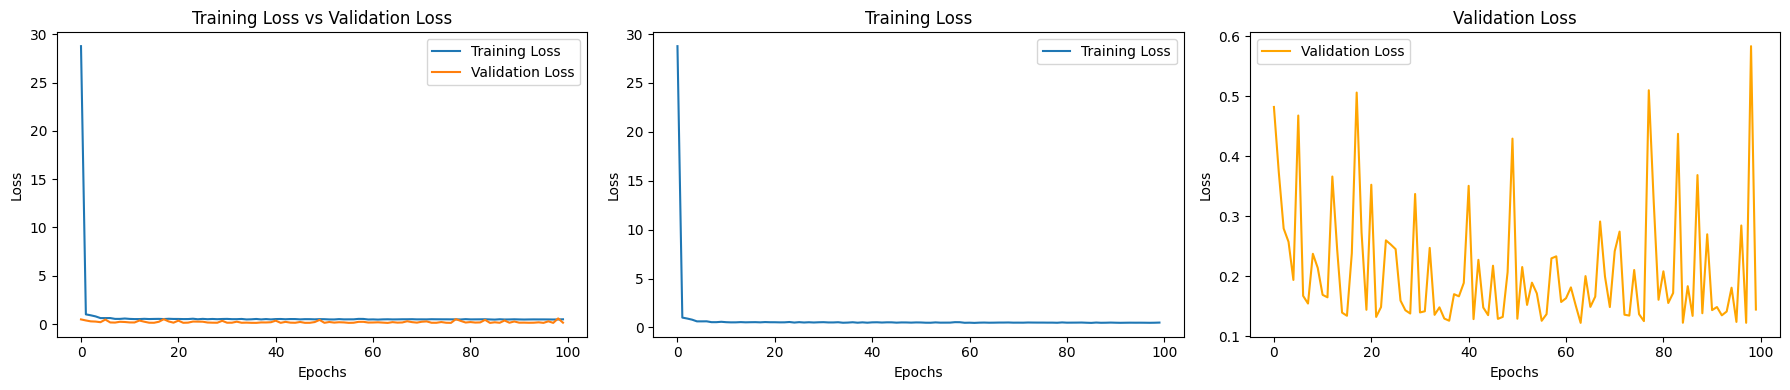

In [482]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(history_baseline_CSCO.history['loss'], label='Training Loss')
axes[0].plot(history_baseline_CSCO.history['val_loss'], label='Validation Loss')
axes[0].set_title("Training Loss vs Validation Loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

axes[1].plot(history_baseline_CSCO.history['loss'], label='Training Loss')
axes[1].set_title("Training Loss")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].legend()

axes[2].plot(history_baseline_CSCO.history['val_loss'], label='Validation Loss', color='orange')
axes[2].set_title("Validation Loss")
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("Loss")
axes[2].legend()

plt.tight_layout()
plt.show()

##### **RMSE**

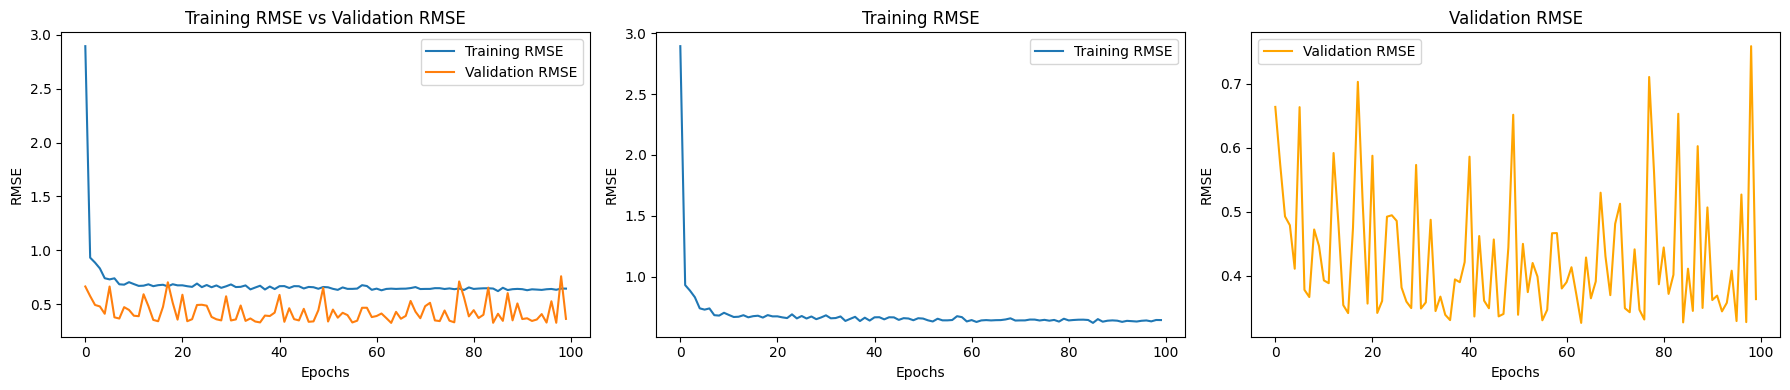

In [483]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(history_baseline_CSCO.history['rmse'], label='Training RMSE')
axes[0].plot(history_baseline_CSCO.history['val_rmse'], label='Validation RMSE')
axes[0].set_title("Training RMSE vs Validation RMSE")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("RMSE")
axes[0].legend()

axes[1].plot(history_baseline_CSCO.history['rmse'], label='Training RMSE')
axes[1].set_title("Training RMSE")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("RMSE")
axes[1].legend()

axes[2].plot(history_baseline_CSCO.history['val_rmse'], label='Validation RMSE', color='orange')
axes[2].set_title("Validation RMSE")
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("RMSE")
axes[2].legend()

plt.tight_layout()
plt.show()

##### **MAE**

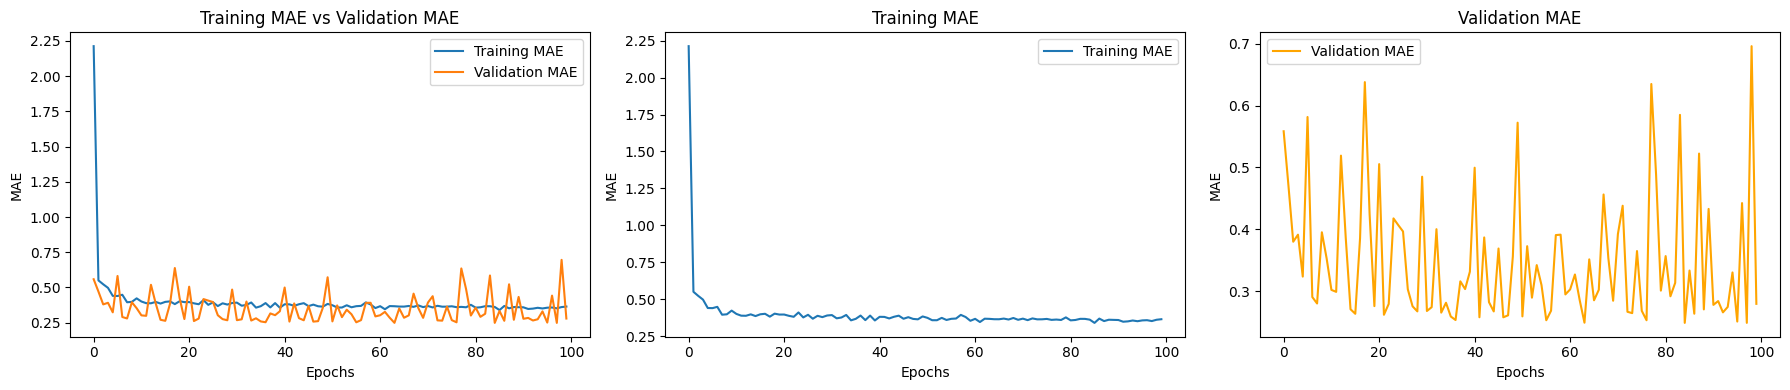

In [484]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(history_baseline_CSCO.history['mae'], label='Training MAE')
axes[0].plot(history_baseline_CSCO.history['val_mae'], label='Validation MAE')
axes[0].set_title("Training MAE vs Validation MAE")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("MAE")
axes[0].legend()

axes[1].plot(history_baseline_CSCO.history['mae'], label='Training MAE')
axes[1].set_title("Training MAE")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("MAE")
axes[1].legend()

axes[2].plot(history_baseline_CSCO.history['val_mae'], label='Validation MAE', color='orange')
axes[2].set_title("Validation MAE")
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("MAE")
axes[2].legend()

plt.tight_layout()
plt.show()

##### **MAPE**

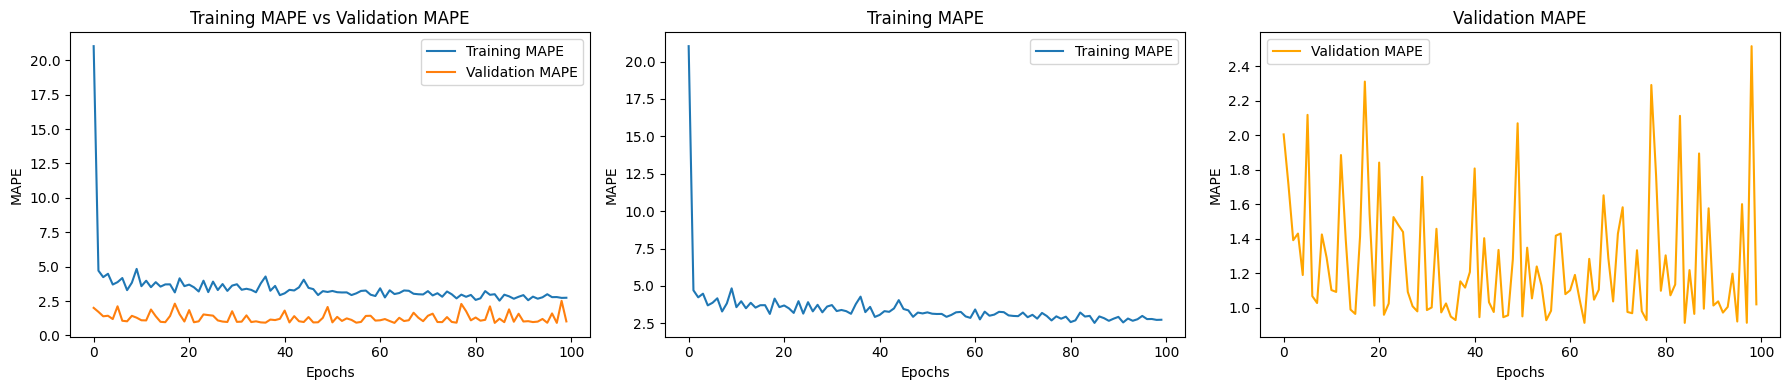

In [485]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(history_baseline_CSCO.history['mape'], label='Training MAPE')
axes[0].plot(history_baseline_CSCO.history['val_mape'], label='Validation MAPE')
axes[0].set_title("Training MAPE vs Validation MAPE")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("MAPE")
axes[0].legend()

# Training MAPE only
axes[1].plot(history_baseline_CSCO.history['mape'], label='Training MAPE')
axes[1].set_title("Training MAPE")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("MAPE")
axes[1].legend()

# Validation MAPE only
axes[2].plot(history_baseline_CSCO.history['val_mape'], label='Validation MAPE', color='orange')
axes[2].set_title("Validation MAPE")
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("MAPE")
axes[2].legend()

plt.tight_layout()
plt.show()

### **2. MODIFICATED MODEL**

In [627]:
from tensorflow.keras.regularizers import l1
from tensorflow.keras.layers import LSTM, Dense, Dropout

hidden_units = 60

model_modif_CSCO = Sequential()
model_modif_CSCO.add(LSTM(units=hidden_units, activation='relu', input_shape=(window_size, 1), return_sequences=True))
model_modif_CSCO.add(Dropout(0.2))
model_modif_CSCO.add(LSTM(units=hidden_units - 20, activation='relu'))
model_modif_CSCO.add(Dense(units=horizon))

model_modif_CSCO.build()
model_modif_CSCO.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 5, 60)             14880     
                                                                 
 dropout_8 (Dropout)         (None, 5, 60)             0         
                                                                 
 lstm_33 (LSTM)              (None, 40)                16160     
                                                                 
 dense_24 (Dense)            (None, 1)                 41        
                                                                 
Total params: 31081 (121.41 KB)
Trainable params: 31081 (121.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [628]:
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import MeanAbsoluteError, MeanAbsolutePercentageError, MeanSquaredError

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

optimizer = Adam()

model_modif_CSCO.compile(optimizer=optimizer,
                         loss='mse',
                         metrics=[
                             rmse,
                             MeanAbsoluteError(name='mae'),
                             MeanAbsolutePercentageError(name='mape')])

In [636]:
history_modif_CSCO = model_modif_CSCO.fit(x_train_CSCO, y_train_CSCO,
                             epochs=100,
                             batch_size=32,
                             validation_data=(x_val_CSCO, y_val_CSCO))

Epoch 1/100
190/190 [==============================] - 1s 8ms/step - loss: 0.5812 - rmse: 0.7014 - mae: 0.4060 - mape: 3.6019 - val_loss: 28.6590 - val_rmse: 5.3534 - val_mae: 5.3159 - val_mape: 19.1311
Epoch 2/100
190/190 [==============================] - 1s 7ms/step - loss: 0.5544 - rmse: 0.6913 - mae: 0.4033 - mape: 3.6093 - val_loss: 28.3670 - val_rmse: 5.3260 - val_mae: 5.2900 - val_mape: 19.0407
Epoch 3/100
190/190 [==============================] - 2s 11ms/step - loss: 0.5714 - rmse: 0.6935 - mae: 0.3987 - mape: 3.8861 - val_loss: 30.1394 - val_rmse: 5.4890 - val_mae: 5.4517 - val_mape: 19.6172
Epoch 4/100
190/190 [==============================] - 2s 13ms/step - loss: 0.5460 - rmse: 0.6820 - mae: 0.3921 - mape: 3.5978 - val_loss: 32.6503 - val_rmse: 5.7138 - val_mae: 5.6771 - val_mape: 20.4352
Epoch 5/100
190/190 [==============================] - 3s 14ms/step - loss: 0.5892 - rmse: 0.7002 - mae: 0.4032 - mape: 3.3428 - val_loss: 28.6308 - val_rmse: 5.3503 - val_mae: 5.3138 - 

In [630]:
x_test_CSCO = x_test_CSCO.reshape((x_test_CSCO.shape[0], x_test_CSCO.shape[1], 1))

train_predict_modif_CSCO = model_modif_CSCO.predict(x_train_CSCO)
val_predict_modif_CSCO = model_modif_CSCO.predict(x_val_CSCO)
test_predict_modif_CSCO = model_modif_CSCO.predict(x_val_CSCO)

print(train_predict_modif_CSCO.shape, val_predict_modif_CSCO.shape, test_predict_modif_CSCO.shape)

24/24 [==============================] - 0s 3ms/step
(6066, 1) (753, 1) (753, 1)


### **PLOT PREDICTION**

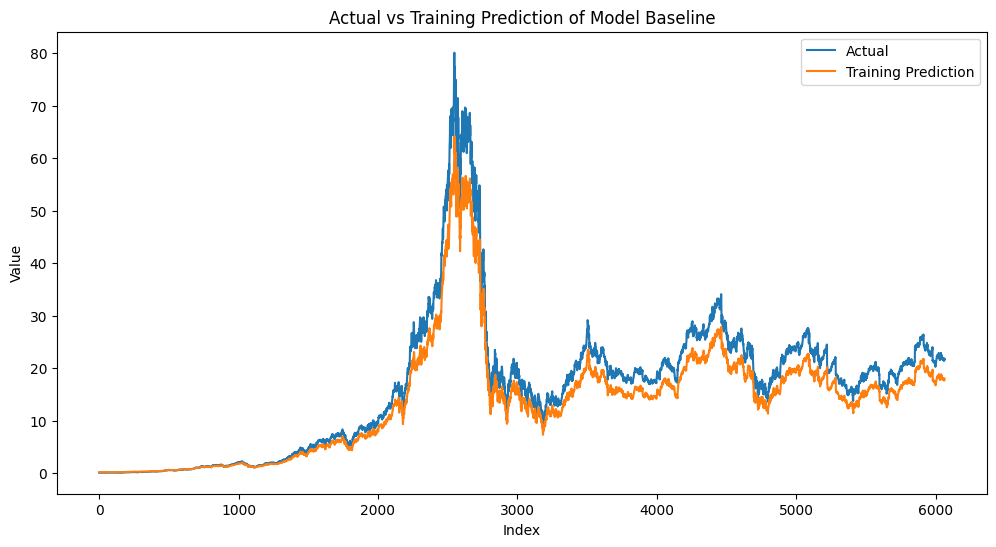

In [631]:
plt.figure(figsize =(12, 6))
plt.plot(y_train_CSCO, label="Actual")
plt.plot(train_predict_modif_CSCO, label="Training Prediction")
plt.title("Actual vs Training Prediction of Model Baseline")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

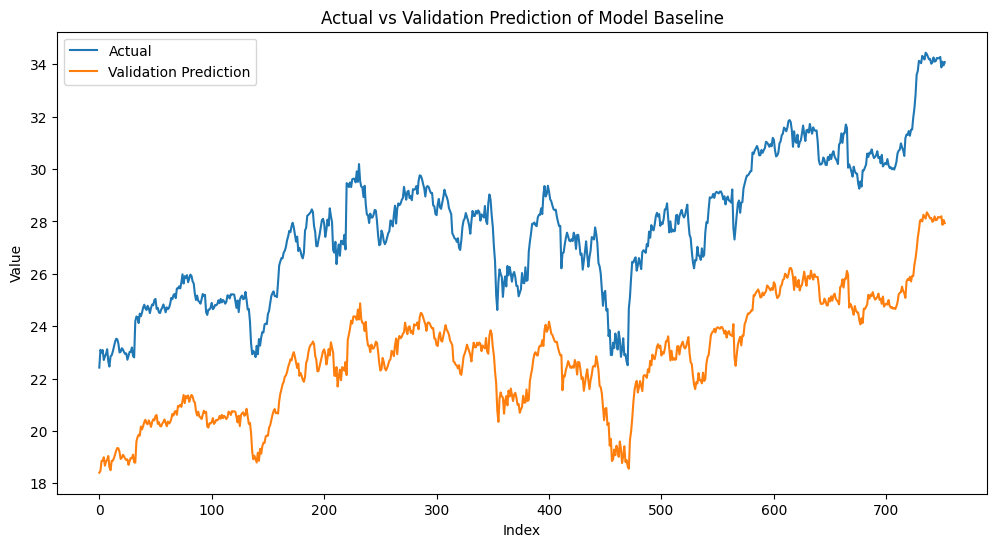

In [632]:
plt.figure(figsize =(12, 6))
plt.plot(y_val_CSCO, label="Actual")
plt.plot(val_predict_modif_CSCO, label="Validation Prediction")
plt.title("Actual vs Validation Prediction of Model Baseline")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

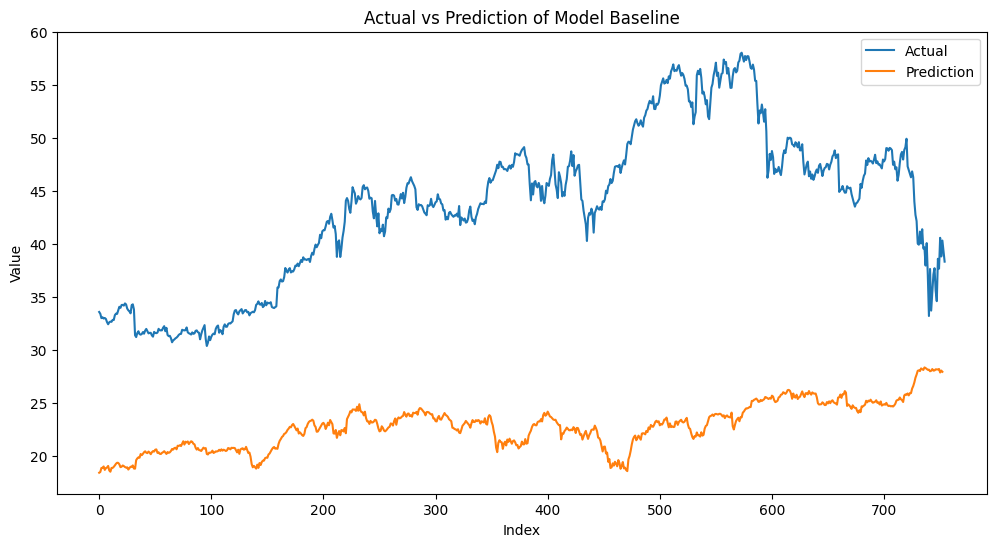

In [633]:
plt.figure(figsize =(12, 6))
plt.plot(y_test_CSCO, label="Actual")
plt.plot(test_predict_modif_CSCO, label="Prediction")
plt.title("Actual vs Prediction of Model Baseline")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

#### **MODIFICATED MODEL EVALUATION**

In [638]:
x_train_CSCO = x_train_CSCO.reshape((x_train_CSCO.shape[0], window_size, 1))
train_eval_modif_CSCO = model_modif_CSCO.evaluate(x_train_CSCO, y_train_CSCO)
print(f"Train data - Loss: {train_eval_modif_CSCO[0]}, RMSE: {train_eval_modif_CSCO[1]}, MAE: {train_eval_modif_CSCO[2]}, MAPE: {train_eval_modif_CSCO[3]}")

190/190 [==============================] - 1s 3ms/step - loss: 15.9833 - rmse: 3.0209 - mae: 2.9830 - mape: 22.3712
Train data - Loss: 15.983327865600586, RMSE: 3.020916700363159, MAE: 2.9830031394958496, MAPE: 22.371170043945312


In [639]:
x_val_CSCO = x_val_CSCO.reshape((x_val_CSCO.shape[0], window_size, 1))
val_eval_modif_CSCO = model_modif_CSCO.evaluate(x_val_CSCO, y_val_CSCO)
print(f"Validation data - Loss: {val_eval_modif_CSCO[0]}, RMSE: {val_eval_modif_CSCO[1]}, MAE: {val_eval_modif_CSCO[2]}, MAPE: {val_eval_modif_CSCO[3]}")

24/24 [==============================] - 0s 6ms/step - loss: 25.9786 - rmse: 5.0974 - mae: 5.0631 - mape: 18.2291
Validation data - Loss: 25.978565216064453, RMSE: 5.097438335418701, MAE: 5.063082218170166, MAPE: 18.229148864746094


In [640]:
x_test_CSCO = x_test_CSCO.reshape((x_test_CSCO.shape[0], window_size, 1))
test_eval_modif_CSCO = model_modif_CSCO.evaluate(x_test_CSCO, y_test_CSCO)
print(f"Test data - Loss: {test_eval_modif_CSCO[0]}, RMSE: {test_eval_modif_CSCO[1]}, MAE: {test_eval_modif_CSCO[2]}, MAPE: {test_eval_modif_CSCO[3]}")

24/24 [==============================] - 0s 6ms/step - loss: 69.6347 - rmse: 8.1977 - mae: 8.1790 - mape: 18.7000
Test data - Loss: 69.63471984863281, RMSE: 8.19766902923584, MAE: 8.179048538208008, MAPE: 18.700040817260742


In [641]:
print(f"Train data - Loss (MSE): {train_eval_modif_CSCO[0]}")
print(f"Train data - RMSE: {train_eval_modif_CSCO[1]}")
print(f"Train data - MAE: {train_eval_modif_CSCO[2]}")
print(f"Train data - MAPE: {train_eval_modif_CSCO[3]}")
print("-------------------------------------------------------------------------------------")
print(f"Validation data - Loss (MSE): {val_eval_modif_CSCO[0]}")
print(f"Validation data - RMSE: {val_eval_modif_CSCO[1]}")
print(f"Validation data - MAE: {val_eval_modif_CSCO[2]}")
print(f"Validation data - MAPE: {val_eval_modif_CSCO[3]}")
print("-------------------------------------------------------------------------------------")
print(f"Test data - Loss (MSE): {test_eval_modif_CSCO[0]}")
print(f"Test data - RMSE: {test_eval_modif_CSCO[1]}")
print(f"Test data - MAE: {test_eval_modif_CSCO[2]}")
print(f"Test data - MAPE: {test_eval_modif_CSCO[3]}")

Train data - Loss (MSE): 15.983327865600586
Train data - RMSE: 3.020916700363159
Train data - MAE: 2.9830031394958496
Train data - MAPE: 22.371170043945312
-------------------------------------------------------------------------------------
Validation data - Loss (MSE): 25.978565216064453
Validation data - RMSE: 5.097438335418701
Validation data - MAE: 5.063082218170166
Validation data - MAPE: 18.229148864746094
-------------------------------------------------------------------------------------
Test data - Loss (MSE): 69.63471984863281
Test data - RMSE: 8.19766902923584
Test data - MAE: 8.179048538208008
Test data - MAPE: 18.700040817260742




```
1. Training data
Loss : 15.9833
RMSE : 3.0209
MAE : 2.9830
MAPE : 22.3712
```
Loss, RMSE, MAE dan MAPE menunjukkan angka yang relatif tinggi menunjukkan bahwa model tidak dapat berlatih dengan baik pada data training.

```
2. Validation Data
Loss : 25.9786
RMSE : 5.0974
MAE : 5.0631
MAPE : 18.2291
```
Nilai metrik yang dihasilkan pada data validation menunjukkan nilai yang lebih tinggi dibandingkan pada data training. Hal ini menunjukkan bahwa model tidak dapat berlatih dengan baik pada data validation.

```
3. Testing Data
Loss : 69.6347
RMSE : 8.1977
MAE : 8.1790
MAPE : 18.7000
```
Pada data testing, nilai yang dihasilkan bahkan jauh lebih tinggi dibandingkan pada data  training dan data validation.

Model menunjukkan performa yang tidak baik pada ketiga set dengan nilai Loss, RMSE, MAE dan MAPE yang relatif tinggi. Model juga mengalami overfitting karena jumlah error yang tiba-tiba meningkat pada testing, yang dapat disebabkan karena model hanya mempelajari pola-pola di data training dan tidak dapat menggeneralisasi data baru / data testing.

##### **LOSS**

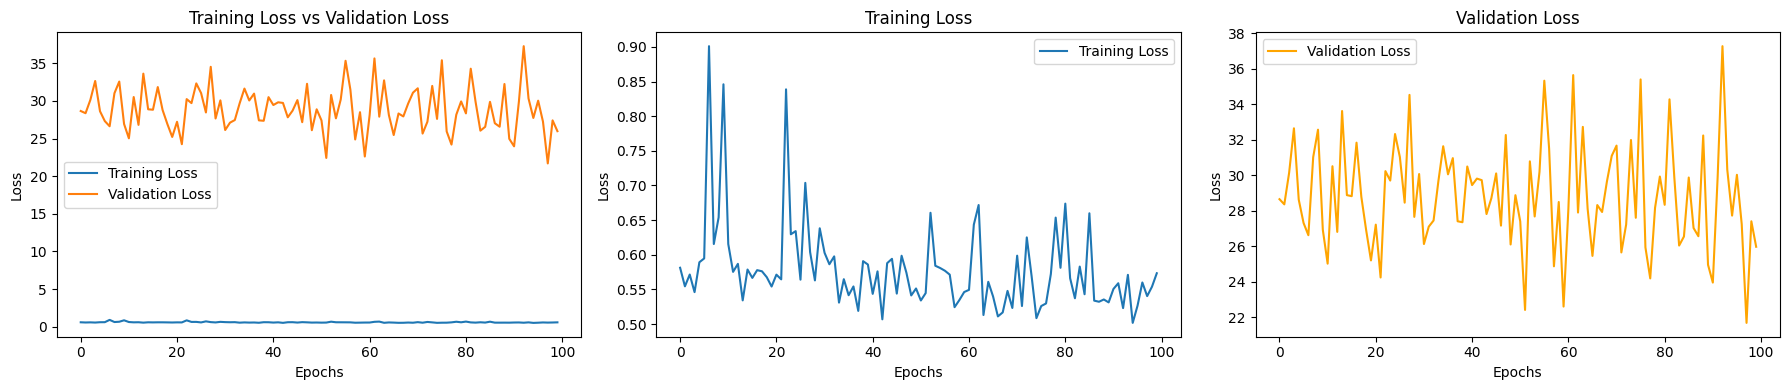

In [642]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(history_modif_CSCO.history['loss'], label='Training Loss')
axes[0].plot(history_modif_CSCO.history['val_loss'], label='Validation Loss')
axes[0].set_title("Training Loss vs Validation Loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

axes[1].plot(history_modif_CSCO.history['loss'], label='Training Loss')
axes[1].set_title("Training Loss")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].legend()

axes[2].plot(history_modif_CSCO.history['val_loss'], label='Validation Loss', color='orange')
axes[2].set_title("Validation Loss")
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("Loss")
axes[2].legend()

plt.tight_layout()
plt.show()

##### **RMSE**

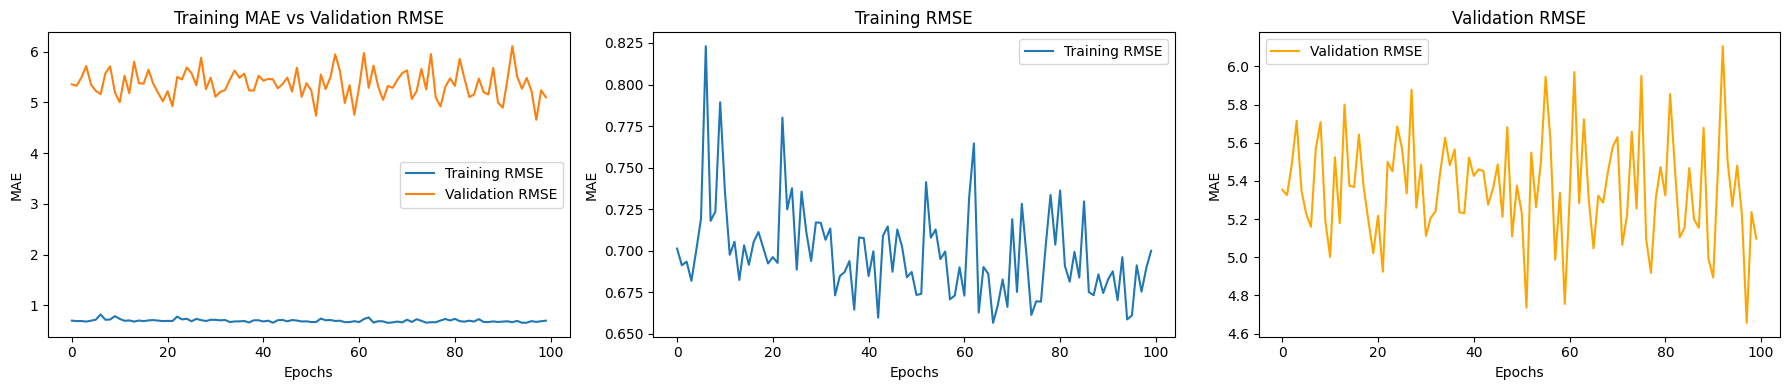

In [643]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(history_modif_CSCO.history['rmse'], label='Training RMSE')
axes[0].plot(history_modif_CSCO.history['val_rmse'], label='Validation RMSE')
axes[0].set_title("Training MAE vs Validation RMSE")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("MAE")
axes[0].legend()

axes[1].plot(history_modif_CSCO.history['rmse'], label='Training RMSE')
axes[1].set_title("Training RMSE")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("MAE")
axes[1].legend()

axes[2].plot(history_modif_CSCO.history['val_rmse'], label='Validation RMSE', color='orange')
axes[2].set_title("Validation RMSE")
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("MAE")
axes[2].legend()

plt.tight_layout()
plt.show()

##### **MAE**

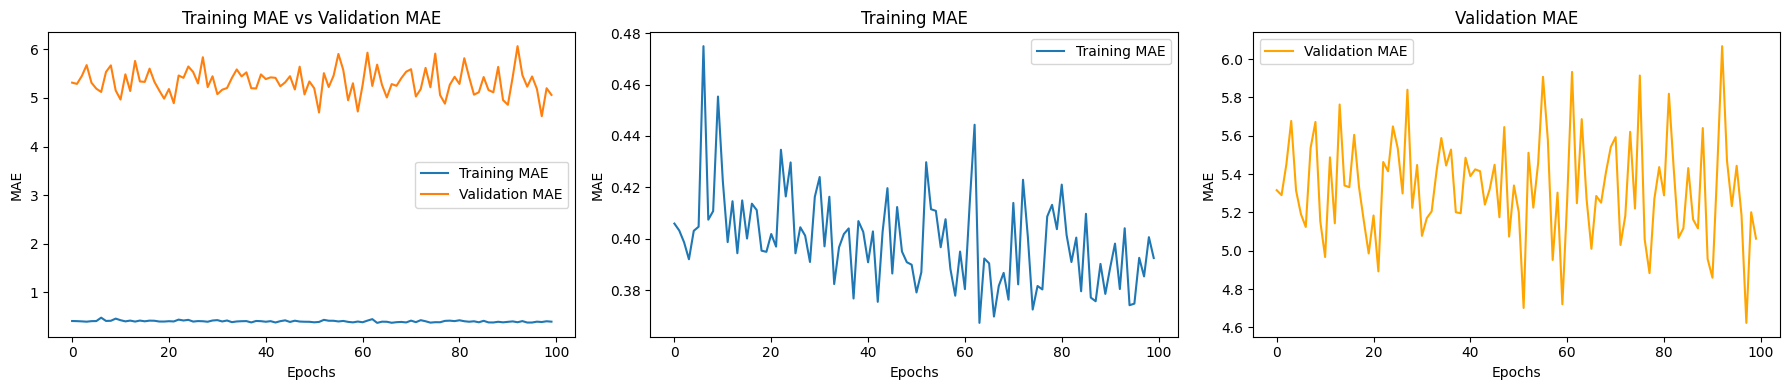

In [644]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(history_modif_CSCO.history['mae'], label='Training MAE')
axes[0].plot(history_modif_CSCO.history['val_mae'], label='Validation MAE')
axes[0].set_title("Training MAE vs Validation MAE")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("MAE")
axes[0].legend()

axes[1].plot(history_modif_CSCO.history['mae'], label='Training MAE')
axes[1].set_title("Training MAE")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("MAE")
axes[1].legend()

axes[2].plot(history_modif_CSCO.history['val_mae'], label='Validation MAE', color='orange')
axes[2].set_title("Validation MAE")
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("MAE")
axes[2].legend()

plt.tight_layout()
plt.show()

##### **MAPE**

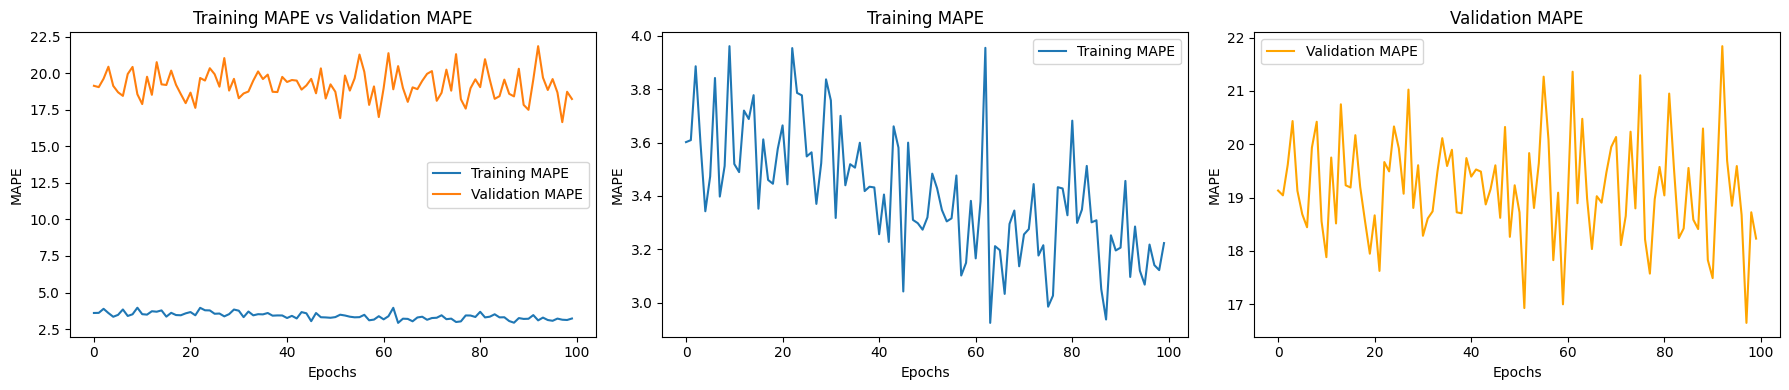

In [645]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(history_modif_CSCO.history['mape'], label='Training MAPE')
axes[0].plot(history_modif_CSCO.history['val_mape'], label='Validation MAPE')
axes[0].set_title("Training MAPE vs Validation MAPE")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("MAPE")
axes[0].legend()

axes[1].plot(history_modif_CSCO.history['mape'], label='Training MAPE')
axes[1].set_title("Training MAPE")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("MAPE")
axes[1].legend()

axes[2].plot(history_modif_CSCO.history['val_mape'], label='Validation MAPE', color='orange')
axes[2].set_title("Validation MAPE")
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("MAPE")
axes[2].legend()

plt.tight_layout()
plt.show()

# **CISCO MODEL COMPARISON**

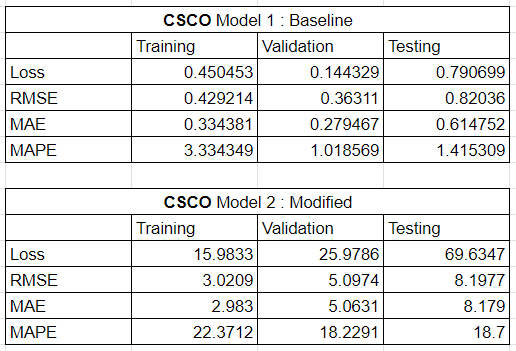

Berdasarkan hasil diatas, Model Baseline bekerja jauh lebih baik pada data CISCO, menghsilkan nilai metrik yang bagus dan konsisten pada training, validation dan testing set. Secara keseuluruhan, model 1 (baseline) cukup bisa memprediksi dengan baik pada data testing. Namun, model 2 mengalami overfitting yang mungkin disebabkan karena tidak dilakukannya scaling di awal.

Modifikasi pada model kedua adalah model yang ditambahkan layer LSTM dan units pada setiap layer nya. Kita dapat menyimpulkan bahwa data CISCO lebih baik diprediksi jika menggunakan arsitektur yang lebih simple.

Kedua data menunjukkan hasil yang lebih baik saat menggunakan arsitektur sederhana dibandingkan dengan arsitektur yang sudah dimodifikasi. Model yang dimodifikasi menjadi lebih kompleks dan rentan terhadap overfitting.


Overfitting terjadi ketika model belajar pola-pola spesifik dalam data training dengan sangat baik, namun tidak dapat menggeneralisasi dengan baik pada data baru yang tidak dilihatnya selama training. Hal ini dapat menyebabkan performa model yang buruk pada data validasi dan testing.